# Imports

In [1]:
import torch
torch.cuda.empty_cache()

from _occupancy_forecasting import ResultsAnalyis

from _dfguru import DataFrameGuru as DFG
import pandas as pd
dfguru = DFG()

# Constants and Utilities

In [2]:
# PATHS
path_to_data = "data/occupancy_forecasting"
paths_to_checkpoints = [
    "/home/berni/transfer_from_server/wrap_up_combs_1",
    "/home/berni/transfer_from_server/wrap_up_combs_2",
    "/home/berni/transfer_from_server/wrap_up_combs_3"
]
paths_to_results = [
    "results_server_1_test_all_helper_files_2days.txt",
    "results_server_2_test_all_helper_files_2days.txt",
    "results_server_3_test_all_helper_files_2days.txt"
]

# VARIABLES
# loss types
loss_types = ["MAE", "RMSE", "MSE", "MAE_denorm", "MSE_denorm", "RMSE_denorm" ]

# make a dictionary for renaming
name_mapping = {
    "occrate": "OccupancyRate",
    "avgocc": "AvgOccupancy",
    "coursenumber": "CourseNumber",
    "exam": "Exam",
    "tutorium_test_cancelled": "Tutorium|Test|Cancelled",
    "type": "CourseType",
    "registered": "Registered",
    "lecture": "Lecture",
    "studyarea": "StudyArea",
    "dow": "DayOfWeek",
    "hod": "HourOfDay",
    "weather": "Weather"
}
fundamental_features = list(name_mapping.keys())
# assert length
assert len(fundamental_features) == 12
# assert unique values
assert len(set(fundamental_features)) == 12

In [3]:
# functions
def extract_fundamental_features(feature_string, fundamental_features):
    return [f for f in fundamental_features if f in feature_string]

def apply_name_mapping(feature_list, name_mapping):
    return [name_mapping[f] for f in feature_list]

## Load results

In [4]:
analyzer = ResultsAnalyis(
    path_to_data=path_to_data,
    dfguru=dfguru
)

# PARSE RESULTS TXT FILES
#parse_results = analyzer.data_preparation(paths_to_results, paths_to_checkpoints)
#analyzer.save_dataframe(parse_results, "data", "parsed_results")

# PROCESS PARSED TXT FILES
# parsed_results = analyzer.load_dataframe("data", "parsed_results")
# pivot_results = analyzer.filter_clean_pivot(parsed_results, {"loss_type": loss_types, "dataset": "test"}).reset_index()
# pivot_results.columns.name = None
# pivot_results = pivot_results.rename(
#     columns={"MAE_denorm": "DenormMAE", "MSE_denorm": "DenormMSE", "RMSE_denorm": "DenormRMSE"})
# rename features column
#pivot_results = pivot_results.rename(columns={"features": "FeatureSet", "run_id": "RunID"})
## apply extraction of fundamental features
#pivot_results["FeatureSet"] = pivot_results["FeatureSet"].apply(
#    lambda x: extract_fundamental_features(x, fundamental_features)
#)
## apply name mapping
#pivot_results["FeatureSet"] = pivot_results["FeatureSet"].apply(
#    lambda x: apply_name_mapping(x, name_mapping)
#)
# analyzer.save_dataframe(pivot_results, "results", "raw_evaluation_results")


# LOAD PROCESSED DATA
df_not_grouped = analyzer.load_dataframe("results", "raw_evaluation_results")
df_not_grouped

FeatureSet  RunID       MAE  \
0                                      ['OccupancyRate']      0  0.020750   
1                                      ['OccupancyRate']      1  0.021498   
2                                      ['OccupancyRate']      2  0.021278   
3                                      ['OccupancyRate']      3  0.021168   
4                                      ['OccupancyRate']      4  0.021944   
...                                                  ...    ...       ...   
10235  ['OccupancyRate', 'CourseType', 'StudyArea', '...      0  0.016993   
10236  ['OccupancyRate', 'CourseType', 'StudyArea', '...      1  0.016538   
10237  ['OccupancyRate', 'CourseType', 'StudyArea', '...      2  0.016425   
10238  ['OccupancyRate', 'CourseType', 'StudyArea', '...      3  0.016699   
10239  ['OccupancyRate', 'CourseType', 'StudyArea', '...      4  0.016310   

       DenormMAE       MSE  DenormMSE      RMSE  DenormRMSE  
0       3.298984  0.003461  88.634960  0.026785    4.257348  
1       3.419336  0.003627  92.997160  0.027013    4.295266  
2       3.386159  0.003531  90.590100  0.027101    4.310824  
3       3.366414  0.003396  86.937744  0.026886    4.274557  
4       3.489840  0.003640  93.113100  0.027775    4.415545  
...          ...       ...        ...       ...         ...  
10235   2.702412  0.002525  64.723780  0.021801    3.464580  
10236   2.629364  0.002537  64.960550  0.021321    3.385550  
10237   2.611018  0.002384  60.819813  0.021054    3.343198  
10238   2.650075  0.002601  66.201935  0.021576    3.420680  
10239   2.589134  0.002315  58.930454  0.020872    3.310746  

[10240 rows x 8 columns]

# Section: Global Performance Statistics

In [5]:
loss_columns = ["MAE", "RMSE", "MSE", "DenormMAE", "DenormRMSE", "DenormMSE"]

In [6]:
loss_columns = ["MAE", "RMSE", "MSE", "DenormMAE", "DenormRMSE", "DenormMSE"]
aggregate_dict = {x: "mean" for x in loss_columns}
df_feature_grouped_mean = df_not_grouped.groupby('FeatureSet').agg(
            aggregate_dict,
        )

df_feature_grouped_mean.reset_index(inplace=True)

In [7]:

loss_columns_new_names = {
    "MAE": "AvgMAE",
    "RMSE": "AvgRMSE",
    "MSE": "AvgMSE",
    "DenormMAE": "AvgDenormMAE",
    "DenormRMSE": "AvgDenormRMSE",
    "DenormMSE": "AvgDenormMSE"
}
df_feature_grouped_mean = df_feature_grouped_mean.rename(columns=loss_columns_new_names)
loss_columns = ["AvgMAE", "AvgRMSE", "AvgMSE", "AvgDenormMAE", "AvgDenormRMSE", "AvgDenormMSE"]

analyzer.save_dataframe(df_feature_grouped_mean.head(5).round(5), "results", "featureset_grouped_for_thesis")

True

## Calculate min and max

In [17]:
# Calculate both maximum and minimum loss for each loss column

precision=5 
loss_stats_dict = {}
for col in loss_columns:
    min_row = df_feature_grouped_mean.loc[df_feature_grouped_mean[col].idxmin()]
    max_row = df_feature_grouped_mean.loc[df_feature_grouped_mean[col].idxmax()]
    reduction_percent = round(((max_row[col] - min_row[col]) / max_row[col]) * 100, precision//2)
    loss_stats_dict[col] = {
        "Minimum": round(min_row[col], precision),
        "Maximum": round(max_row[col], precision),
        "Reduction (%)": reduction_percent
    }
loss_stats_df = pd.DataFrame(loss_stats_dict).T
loss_stats_df


Minimum   Maximum  Reduction (%)
AvgMAE          0.01470   0.02227          33.97
AvgRMSE         0.01896   0.02846          33.39
AvgMSE          0.00193   0.00356          45.88
AvgDenormMAE    2.33323   3.53724          34.04
AvgDenormRMSE   3.00767   4.52232          33.49
AvgDenormMSE   48.89707  91.48491          46.55

In [16]:
df_feature_grouped_mean['FeatureSet'].iloc[-1]

"['OccupancyRate']"

In [11]:
df_feature_grouped_mean['FeatureSet'].apply(lambda x: 'occrate' if x == ["OccupancyRate"] else 'other')


0       other
1       other
2       other
3       other
4       other
        ...  
2043    other
2044    other
2045    other
2046    other
2047    other
Name: FeatureSet, Length: 2048, dtype: object

## Grouping and Basic Scatter Plots

In [22]:
import ast

In [ ]:
# convert column to list
df_feature_grouped_mean['FeatureSet'] = df_feature_grouped_mean['FeatureSet'].apply(ast.literal_eval)

In [25]:
analyzer.scatter_plot_feature_group(
    df_feature_grouped_mean, 
    x_col="AvgDenormMAE", 
    y_col="AvgDenormMSE",
    file_name="mae_vs_mse.png")

highlight
other      2047
occrate       1
Name: count, dtype: int64


In [10]:
raise Exception("STOP HERE")

Exception: STOP HERE

In [ ]:
#df_feature_grouped = analyzer.group_by_features(pivot_results, "test_loss")
#df_feature_grouped

In [ ]:
# same result with df_not_grouped except for some std values -> avg of avg
#df_subfeature_grouped = analyzer.group_by_subfeatures(df_feature_grouped, "mean_loss").sort_values("mean_loss").reset_index(drop=True)

: 

In [ ]:
# same result with df_not_grouped except for some std values -> avg of avg
df_fundamental_grouped = analyzer.group_by_fundamental_features(df_feature_grouped, "MAE")
df_fundamental_grouped

features  mean_loss  std_loss  count
0                 studyarea   0.017470  0.000913   1024
1                   lecture   0.017996  0.001309   1024
2                      type   0.018007  0.001340   1024
3                registered   0.018041  0.001426   1024
4   tutorium_test_cancelled   0.018088  0.001420   1024
5                       hod   0.018097  0.001426   1024
6                    avgocc   0.018111  0.001348   1024
7                       dow   0.018127  0.001369   1024
8                   occrate   0.018141  0.001399   2048
9                   weather   0.018411  0.001350   1024
10                     exam   0.018452  0.001356   1024
11             coursenumber   0.019047  0.001107   1024

In [ ]:
df_component_grouped = analyzer.group_by_component_features(df_feature_grouped, "mean_loss")

: 

In [ ]:
analyzer.scatter_plot_feature_group(df_feature_grouped)

: 

### Table df_not_grouped

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

df_print = df_not_grouped.copy(deep = True)
df_print["features"] = df_print["features"].apply(lambda x: x.split("_"))
df_print.rename(columns={"features": "feature_combination"}, inplace=True)


df_print.sort_values("test_loss").reset_index(drop=True)

feature_combination  \
0                  [occrate, avgocc, coursenumber, dow, tutorium, test, cancelled, type, lecture]   
1       [occrate, coursenumber, exam, dow, hod, tutorium, test, cancelled, registered, studyarea]   
2                    [occrate, avgocc, coursenumber, tutorium, test, cancelled, type, registered]   
3      [occrate, avgocc, coursenumber, hod, tutorium, test, cancelled, type, registered, lecture]   
4                       [occrate, avgocc, coursenumber, tutorium, test, cancelled, type, lecture]   
...                                                                                           ...   
10235                                                   [occrate, dow, tutorium, test, cancelled]   
10236                                                                        [occrate, exam, dow]   
10237                                                                   [occrate, exam, dow, hod]   
10238                                                                          [occrate, weather]   
10239                                                                          [occrate, weather]   

       run_id  test_loss  
0           4   0.014316  
1           0   0.014336  
2           2   0.014342  
3           3   0.014347  
4           3   0.014361  
...       ...        ...  
10235       3   0.022791  
10236       1   0.022818  
10237       3   0.022986  
10238       1   0.023050  
10239       4   0.023480  

[10240 rows x 3 columns]

: 

In [ ]:
# group by feature results
import pandas as pd
pd.set_option('display.max_colwidth', 100)

df_print = df_feature_grouped.copy(deep = True)
df_print["features"] = df_print["features"].apply(lambda x: x.split("_"))
# rename features to feature_combination
df_print.rename(columns={"features": "feature_combination"}, inplace=True)


df_print.sort_values("mean_loss", ascending=False).head(5)

feature_combination  mean_loss  std_loss
2047                             [occrate, weather]   0.022267  0.000927
2046  [occrate, weather, tutorium, test, cancelled]   0.022208  0.000491
2045      [occrate, dow, tutorium, test, cancelled]   0.022033  0.000623
2044                           [occrate, exam, dow]   0.022002  0.001008
2043                                 [occrate, dow]   0.021907  0.000541

: 

### By Component Feature

In [ ]:
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt

def generate_k_values_dataframe(dataframe, sort_column, K_values, ascending=True):

    results = []

    for K in K_values:
        # Filter top K rows
        df_in = analyzer.top_k_rows(dataframe, sort_column, K, ascending)

        # Group by fundamental features
        df_componenet_grouped = analyzer.group_by_component_features(df_in, sort_column)

        df_componenet_grouped["len_features"] = df_componenet_grouped["features"].apply(lambda x: len(x.split(",")))
        
        # Store results in the dictionary
        results.append(df_componenet_grouped)
        

    # Combine all results into a single DataFrame
    return results

def plot_count_vs_mean_loss_with_padding(df_list, k_values, filename="component_features_accross_K.png"):
    """
    Creates a grid layout with three subplots per row, plotting Count/K vs Mean Loss for each K value.
    Adjusted to include dynamic padding around points to keep annotations within the plot boundaries.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames, each containing 'features', 'mean_loss', 'std_loss', and 'count'.
        k_values (list of int): List of K values corresponding to each DataFrame in df_list.
        filename (str): Path and filename to save the figure.
    
    Returns:
        None
    """
    # Ensure inputs are valid
    if len(df_list) != len(k_values):
        raise ValueError("The number of DataFrames must match the number of K values.")

    # Calculate grid size
    num_plots = len(k_values)
    cols = 2  # Number of columns in the grid
    rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of single-row/column grids

    for i, (df, k) in enumerate(zip(df_list, k_values)):
        ax = axes[i]
        
        # Remove rows with NaN in "mean_loss"
        df = df.dropna(subset=["mean_loss"])
        
        # remove features == occrate
                
        n_value = df["count"].max()
        
        df = df[~df["features"].str.contains("occrate")]
        
        
        # Normalize 'count' column by dividing by k
        
        df["normalized_count"] = df["count"] / n_value

        # Determine axis limits with padding
        x_min, x_max = df["normalized_count"].min(), df["normalized_count"].max()
        y_min, y_max = df["mean_loss"].min(), df["mean_loss"].max()
        x_padding = (x_max - x_min) * 0.2  # 10% padding
        y_padding = (y_max - y_min) * 0.1  # 10% padding
        
        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Scatter plot
        ax.scatter(df["normalized_count"], df["mean_loss"], label=f"K={k}", alpha=0.7)
        
        # Annotate points
        for _, row in df.iterrows():
            ax.text(
                row["normalized_count"], row["mean_loss"], row["features"],
                fontsize=8, ha='right', va='bottom', alpha=0.7
            )
        
        # Customize each subplot
        ax.set_title(f"K={k}", fontsize=10)
        ax.set_xlabel("Normalized Count", fontsize=9)
        ax.set_ylabel("Mean Loss", fontsize=9)
        ax.grid(alpha=0.3)

    # Hide unused axes
    for ax in axes[num_plots:]:
        ax.axis('off')

    # Add suptitle
    plt.suptitle("Component Feature Analysis Across K-Values", fontsize=12, y=1.05)

    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


k_values = [25, 250]
results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)
results_list = [df.dropna(subset=["mean_loss"]).sort_values("mean_loss").reset_index(drop=True) for df in results_list]
#N = 50    
#results_grouped_list = [analyzer.top_k_rows(df, "mean_loss", N, ascending=True) for df in results_list]
results_grouped_list = [analyzer.group_by_fundamental_features(df, "mean_loss") for df in results_list]

#plot_count_vs_mean_loss_with_padding(results_grouped_list, k_values)

top_25 = results_list[0]

: 

In [ ]:
count_ge_five = [x[x["count"] >= 5].sort_values(["mean_loss", "len_features"]).reset_index(drop=True) for x in results_list]
count_ge_five[0].head()
count_ge_five[1].head()

features  \
0  avgocc,coursenumber,hod,occrate,registered,tutorium_test_cancelled,type   
1         coursenumber,hod,occrate,registered,tutorium_test_cancelled,type   
2             coursenumber,occrate,registered,tutorium_test_cancelled,type   
3      avgocc,coursenumber,occrate,registered,tutorium_test_cancelled,type   
4         coursenumber,dow,occrate,registered,tutorium_test_cancelled,type   

   mean_loss  std_loss  count  len_features  
0   0.015324  0.000497      9             7  
1   0.015336  0.000350     23             6  
2   0.015338  0.000338     41             5  
3   0.015346  0.000475     15             6  
4   0.015371  0.000309     21             6

: 

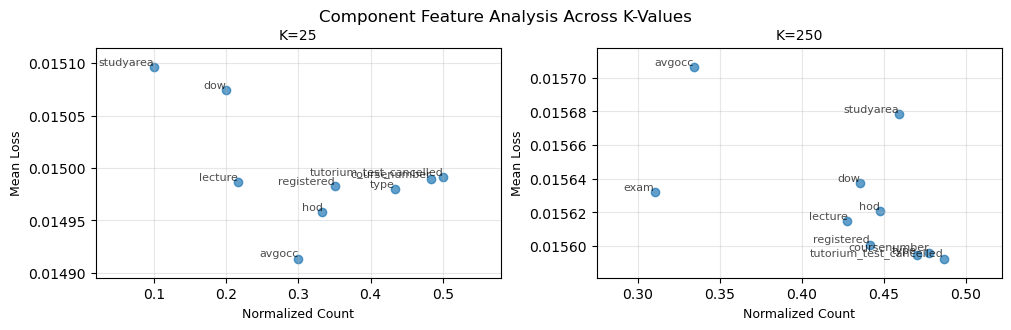

([                   features  mean_loss  std_loss  count
  0                    avgocc   0.014914  0.000048     36
  1                       hod   0.014958  0.000065     40
  2                      type   0.014980  0.000086     52
  3                registered   0.014983  0.000072     42
  4                   lecture   0.014987  0.000028     26
  5              coursenumber   0.014989  0.000076     58
  6   tutorium_test_cancelled   0.014991  0.000073     60
  7                   occrate   0.014991  0.000073    120
  8                       dow   0.015074  0.000017     24
  9                 studyarea   0.015096  0.000018     12
  10                     exam        NaN       NaN      0
  11                  weather        NaN       NaN      0,
                     features  mean_loss  std_loss  count
  0   tutorium_test_cancelled   0.015592  0.000124    323
  1                      type   0.015595  0.000121    312
  2              coursenumber   0.015596  0.000124    317
  3          

: 

In [ ]:
### Apendix if needed
results_grouped_list = [analyzer.group_by_fundamental_features(df, "mean_loss") for df in count_ge_five]
plot_count_vs_mean_loss_with_padding(results_grouped_list, k_values)

results_grouped_list, count_ge_five[0]

## Decision Tree

Objective

Use a decision tree to:

    Show the hierarchy of feature importance (core vs. selective features).
    Highlight key interactions between features.
    Provide an intuitive, visual explanation of why certain features or combinations work better.

Steps to Implement the Decision Tree
1. Prepare the Dataset

    Use the same dataset you used for grouping analysis.
    Ensure the dataset includes:
        Feature columns: Individual features (e.g., coursenumber, registered, avgocc, etc.).
        Target column: mean_loss.

Example dataset:
coursenumber	avgocc	lecture	hod	tutorium_test_cancelled	...	mean_loss
1	0	1	0	1	...	0.016111
1	1	0	1	1	...	0.016125

#### Decision Tree grouped by component feature

In [ ]:
pd.set_option('display.max_colwidth', 100)

#def generate_k_values_dataframe(dataframe, sort_column, K_values, ascending=True):

#    results = []

#    for K in K_values:
#        # Filter top K rows
#        df_in = analyzer.top_k_rows(dataframe, sort_column, K, ascending)

#        # Group by fundamental features
#        df_componenet_grouped = analyzer.group_by_component_features(df_in, sort_column)

#        df_componenet_grouped["len_features"] = df_componenet_grouped["features"].apply(lambda x: len(x.split(",")))
        
#        # Store results in the dictionary
#        results.append(df_componenet_grouped)
        

#    # Combine all results into a single DataFrame
#    return results


#df_component_grouped = analyzer.group_by_component_features(df_feature_grouped, "mean_loss")
#k_values = [10, 25, 100, 250]
#results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)
#results_list = [df.dropna(subset=["mean_loss"]).sort_values("mean_loss").reset_index(drop=True) for df in results_list]

#df = results_list[1]
#X = analyzer.get_binary_features(df)
#X_train, X_test, y_train, y_test = analyzer.prepare_data_decision_tree(
#    df,
#    "mean_loss"
#)

#def fit_decision_trees_to_k(results_list, k_values, target_column):
    
#    parameters = {
#    "max_depth":4
#    }
    
#    models = []
    
#    for k, dataframe in zip(k_values, results_list):
        
    
#        X_train, _, y_train, _ = analyzer.prepare_data_decision_tree(
#            dataframe,
#            target_column
#        )   
        
#        model, _ = analyzer.calc_decision_tree(X_train, y_train,  parameters)
        
#        models.append(model)
        
#    return models
    
    
#fitted_models = fit_decision_trees_to_k(results_list, k_values, "mean_loss")

: 

In [ ]:
df_feature_grouped

features  \
0     occrate_avgocc_coursenumber_hod_tutorium_test_cancelled_type_registered_lecture   
1                 occrate_avgocc_coursenumber_tutorium_test_cancelled_type_registered   
2                            occrate_avgocc_coursenumber_tutorium_test_cancelled_type   
3         occrate_avgocc_coursenumber_dow_hod_tutorium_test_cancelled_type_registered   
4             occrate_avgocc_coursenumber_hod_tutorium_test_cancelled_type_registered   
...                                                                               ...   
2043                                                                      occrate_dow   
2044                                                                 occrate_exam_dow   
2045                                              occrate_dow_tutorium_test_cancelled   
2046                                          occrate_weather_tutorium_test_cancelled   
2047                                                                  occrate_weather   

      mean_loss  std_loss  
0      0.014703  0.000416  
1      0.014737  0.000294  
2      0.014757  0.000180  
3      0.014768  0.000221  
4      0.014773  0.000337  
...         ...       ...  
2043   0.021907  0.000541  
2044   0.022002  0.001008  
2045   0.022033  0.000623  
2046   0.022208  0.000491  
2047   0.022267  0.000927  

[2048 rows x 3 columns]

: 

In [ ]:
df = df_feature_grouped
X = analyzer.get_binary_features(df)
X, y = analyzer.prepare_data_decision_tree(
    df,
    "mean_loss",
    False
)

parameters = {
    "max_depth":4
    }
    
model, _ = analyzer.calc_decision_tree(X, y,  parameters)


: 

In [ ]:
from sklearn import tree
import graphviz

tree.export_graphviz(model, out_file="tree.dot", feature_names=X.columns, filled=True, rounded=True, precision=6)

: 

In [ ]:
s = graphviz.Source.from_file("tree.dot")

s.view()

'tree.dot.pdf'

: 

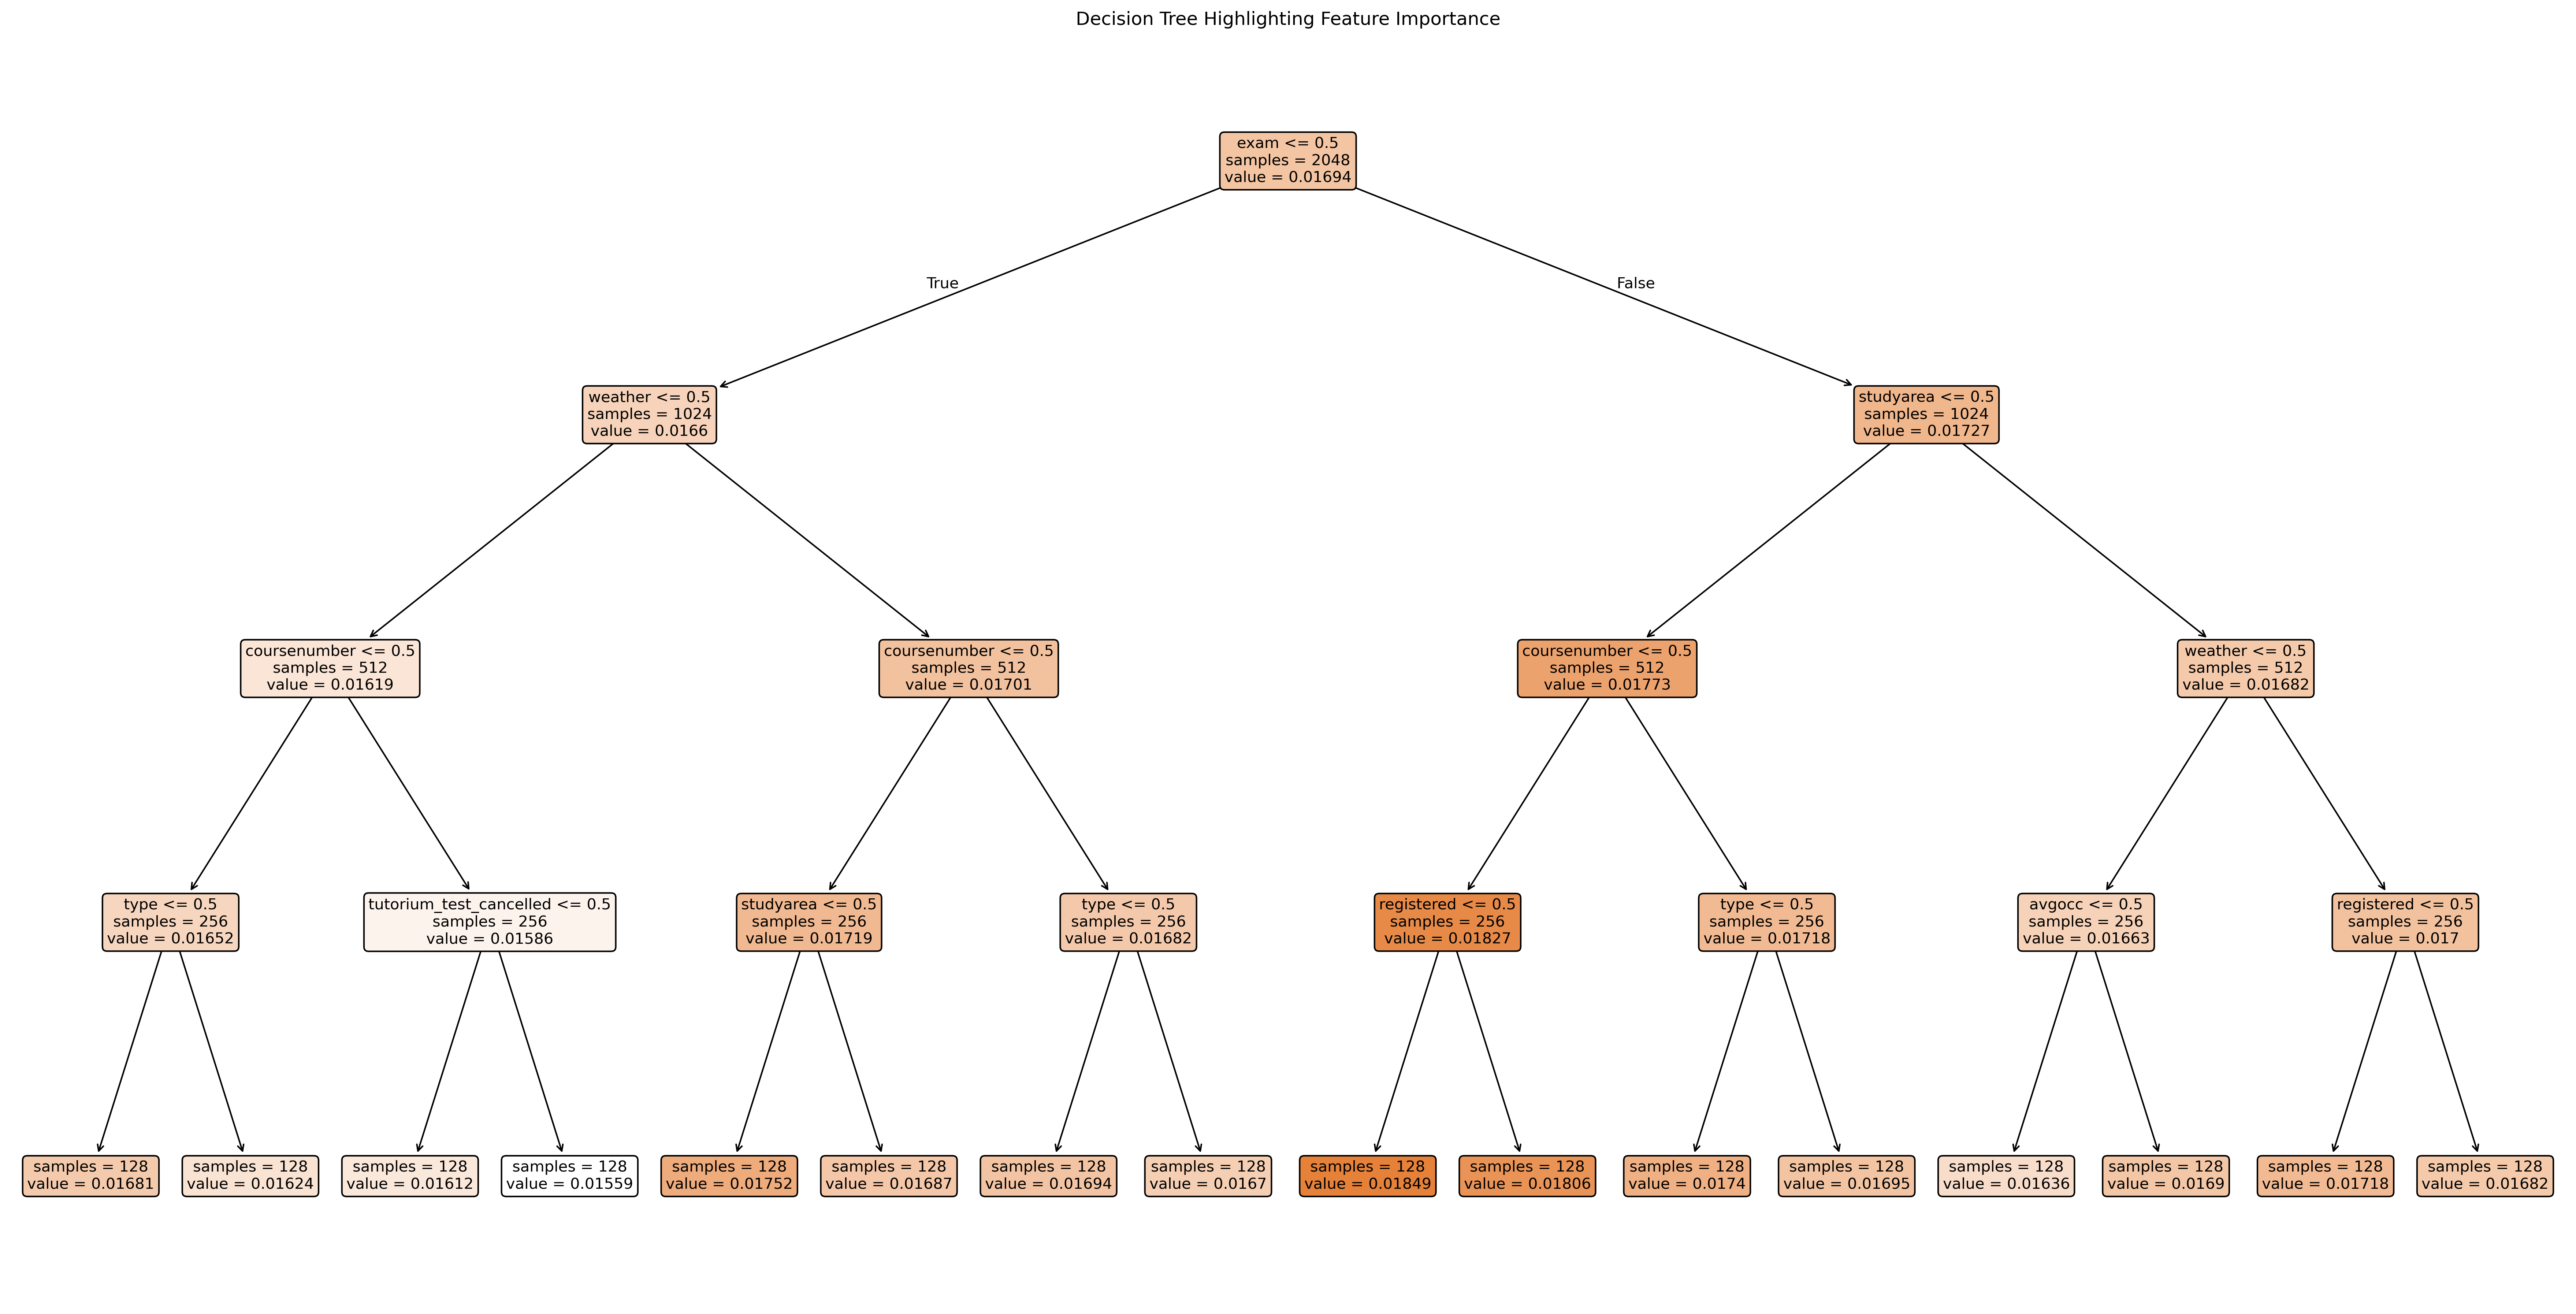

: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10, precision=5, impurity=False)
plt.title("Decision Tree Highlighting Feature Importance")
plt.savefig("tree.png")
plt.show()

: 

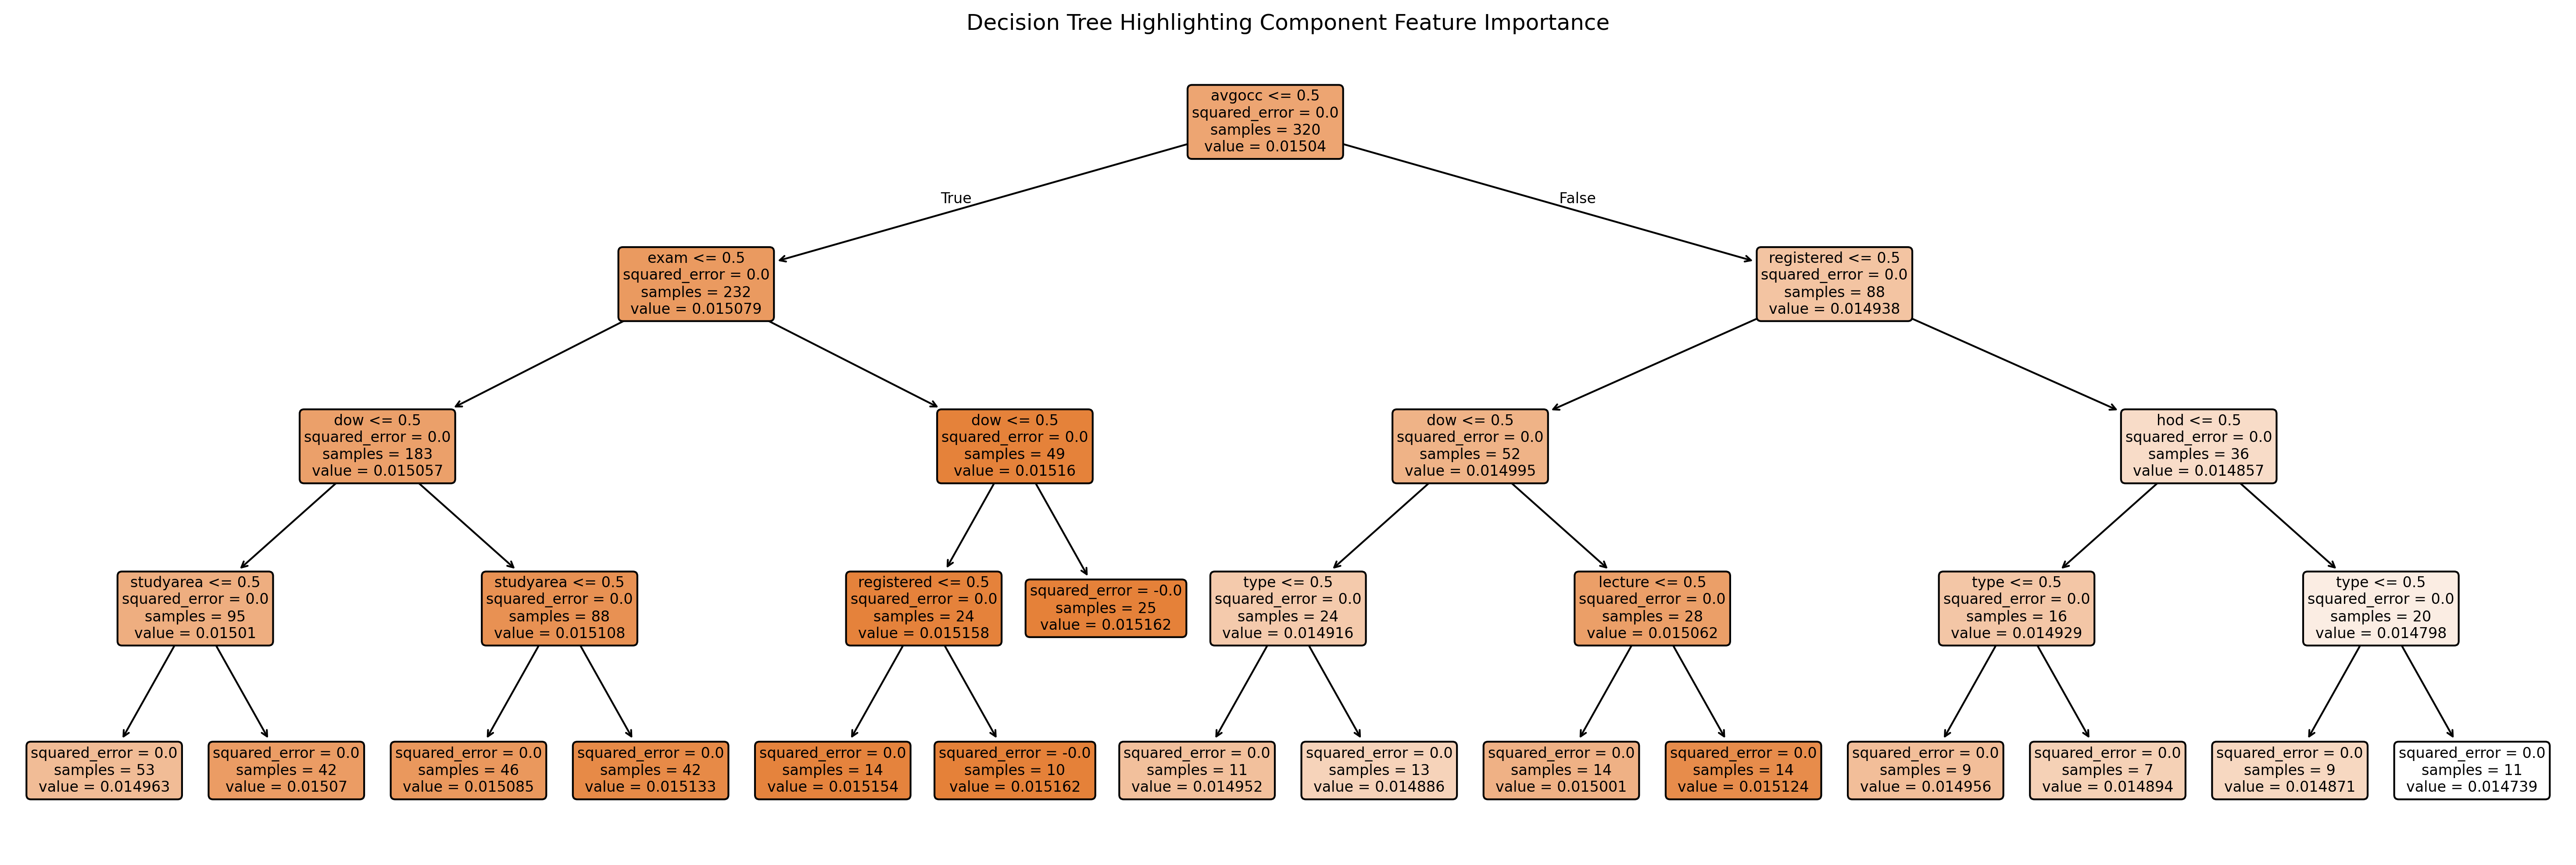

: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = analyzer.get_binary_features(df)
y = df["mean_loss"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the tree
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)  # Keep max_depth small for clarity
tree_model.fit(X_train, y_train)

plt.figure(figsize=(25, 8), dpi=300)
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8, precision=6)
plt.title("Decision Tree Highlighting Component Feature Importance")
plt.savefig("tree.png")
plt.show()

In [ ]:
import networkx as nx


## Example usage:
#if __name__ == "__main__":
#    # Create a sample directed graph
#    G = nx.DiGraph()

#    # Add nodes with values
#    G.add_node(1, value=10)
#    G.add_node(2, value=20)
#    G.add_node(3, value=30)
#    G.add_node(4, value=40)

#    # Add edges
#    G.add_edges_from([(1, 2), (2, 3), (3, 4)])

#    # Define a filter function to remove leaf nodes with value greater than 25
#    def filter_function(value):
#        return value is not None and value > 25

#    # Prune the graph
#    pruned_G = prune_digraph(G, filter_function)

#    # Print the original and pruned graph
#    print("Original Graph Nodes:", G.nodes(data=True))
#    print("Pruned Graph Nodes:", pruned_G.nodes(data=True))


Original Graph Nodes: [(1, {'value': 10}), (2, {'value': 20}), (3, {'value': 30}), (4, {'value': 40})]
Pruned Graph Nodes: [(1, {'value': 10}), (2, {'value': 20}), (3, {'value': 30})]


: 

In [ ]:
import networkx as nx
from sklearn.tree import DecisionTreeClassifier

def decision_tree_to_digraph(decision_tree):
    """
    Convert a scikit-learn DecisionTreeClassifier or DecisionTreeRegressor into a networkx.DiGraph.

    Parameters:
    - decision_tree (DecisionTreeClassifier or DecisionTreeRegressor): The trained decision tree model.

    Returns:
    - digraph (nx.DiGraph): A directed graph representing the decision tree.
    """
    # Initialize a directed graph
    digraph = nx.DiGraph()

    # Extract the tree structure
    tree = decision_tree.tree_

    print(tree)
    # Add nodes and edges
    for node_id in range(tree.node_count):
        # Add the node
        digraph.add_node(node_id, 
                         feature=tree.feature[node_id],  
                         value=tree.value[node_id], 
                         n_samples=tree.n_node_samples[node_id])

        # Add edges if the node is not a leaf
        if tree.children_left[node_id] != -1:
            digraph.add_edge(node_id, tree.children_left[node_id], decision="left")
        if tree.children_right[node_id] != -1:
            digraph.add_edge(node_id, tree.children_right[node_id], decision="right")

    return digraph


df = df_feature_grouped
X = analyzer.get_binary_features(df)
X, y = analyzer.prepare_data_decision_tree(
    df,
    "mean_loss",
    False
)

parameters = {
    "max_depth":7
    }
    
model, _ = analyzer.calc_decision_tree(X, y,  parameters)
tree_graph = decision_tree_to_digraph(model)

: 

In [ ]:
def prune_digraph(graph: nx.DiGraph, value_filter: callable):
    """
    Prune a directed graph by removing leaf nodes based on their values.

    Parameters:
    - graph (nx.DiGraph): The directed graph to prune.
    - value_filter (callable): A function that takes a node value and returns True if the node
                               should be removed, and False otherwise.

    Returns:
    - pruned_graph (nx.DiGraph): A new directed graph with the specified leaf nodes removed.
    """
    # Create a copy of the original graph to avoid modifying it directly
    pruned_graph = graph.copy()

    # Identify leaf nodes (nodes with no outgoing edges)
    leaf_nodes = [node for node in pruned_graph.nodes() if pruned_graph.out_degree(node) == 0]

    # Iterate through the leaf nodes and their data
    for node in leaf_nodes:
        data = pruned_graph.nodes[node]
        # Check if the leaf node should be removed based on its value
        if value_filter(data.get('value', None)):
            pruned_graph.remove_node(node)

    return pruned_graph

def filter_function(value):
    return value is not None and value > 0.016

pruned_G = prune_digraph(tree_graph, filter_function)

print(len(pruned_G.nodes()), len(tree_graph.nodes()))


pruned_G = prune_digraph(pruned_G, filter_function)

print(len(pruned_G.nodes()), len(tree_graph.nodes()))

pruned_G = prune_digraph(pruned_G, filter_function)

print(len(pruned_G.nodes()), len(tree_graph.nodes()))

pruned_G = prune_digraph(pruned_G, filter_function)

print(len(pruned_G.nodes()), len(tree_graph.nodes()))

140 255
85 255
59 255
48 255


: 

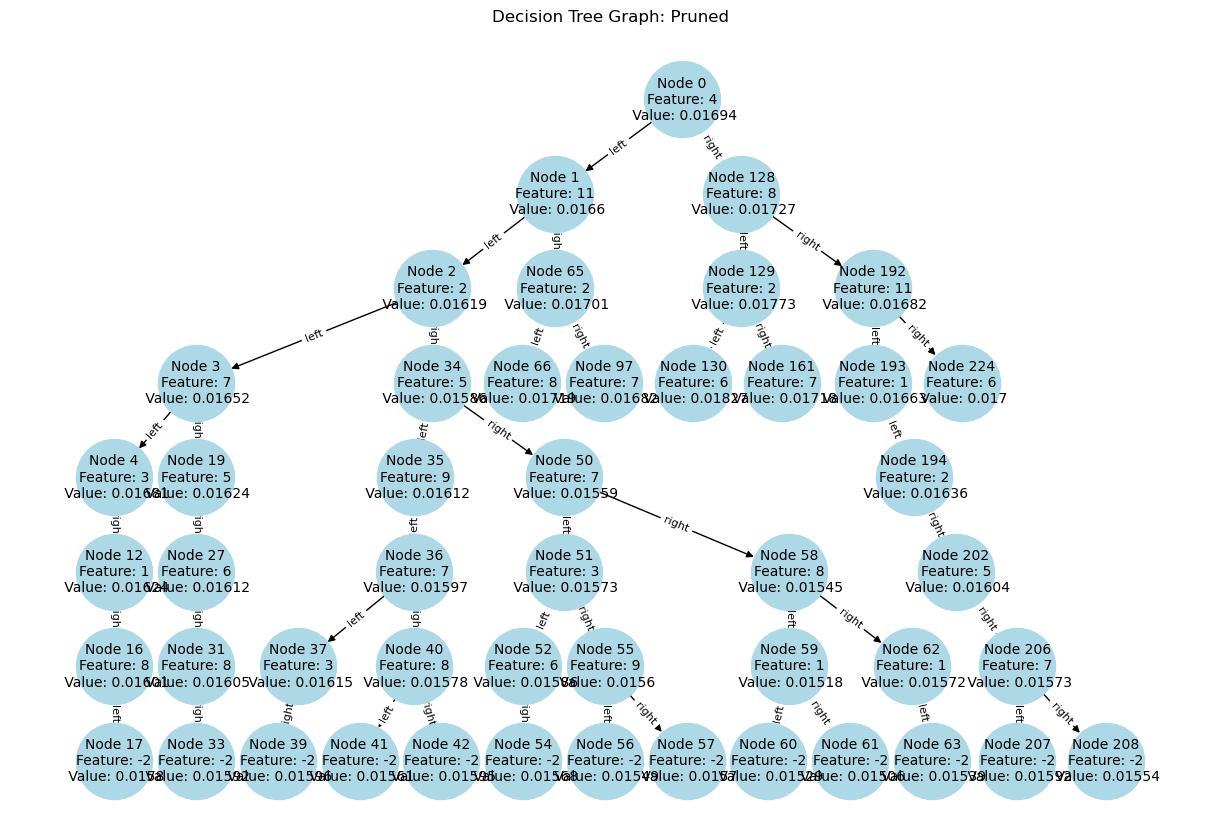

: 

In [ ]:
def plot_digraph(digraph):
    """
    Plot a networkx.DiGraph representing a decision tree.

    Parameters:
    - digraph (nx.DiGraph): The directed graph to plot.
    """
    # Get node labels
    node_labels = {node: f"Node {node}\nFeature: {data['feature']}\n Value: {data['value'][0][0].round(5)}"
        for node, data in digraph.nodes(data=True)}

    # Get edge labels
    edge_labels = {(u, v): d["decision"] for u, v, d in digraph.edges(data=True)}

    # Create a hierarchy-based layout for better structure
    pos = nx.nx_agraph.graphviz_layout(digraph, prog="dot")

    # Plot the graph
    plt.figure(figsize=(12, 8))
    nx.draw(digraph, pos, with_labels=True, labels=node_labels, node_size=3000, node_color="lightblue", font_size=10)
    nx.draw_networkx_edge_labels(digraph, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Decision Tree Graph: Pruned")
    plt.show()
    
plot_digraph(pruned_G)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated MSE: {-grid_search.best_score_:.10f}")

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated MSE: 0.0000000125


: 

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

tree_model = DecisionTreeRegressor(max_depth=4)
# 5-fold cross-validation
scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -scores
print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores):.8}")
print(f"Standard Deviation of MSE: {np.std(mse_scores):.8}")


Cross-Validation MSE Scores: [2.27981966e-08 7.76322968e-09 6.48573765e-09 1.54276991e-08
 1.01059973e-08]
Mean MSE: 1.2516172e-08
Standard Deviation of MSE: 5.9826844e-09


: 

4. Analyze Results

    Hierarchy of Features:
        Note which features appear earlier in the tree (core features) vs. later (selective features).
    Key Interactions:
        Look for splits where combinations (e.g., avgocc after hod) improve predictions significantly.
    Feature Exclusions:
        Identify features that do not appear in the tree, suggesting minimal contribution.
        
Core Features:

    Highlight which features appear in the root or high up in the tree (e.g., coursenumber, tutorium_test_cancelled).
    These validate their dominance in reducing mean loss across combinations.

Selective Features:

    Note selective features like avgocc or hod that appear at conditional splits, showcasing their value in specific contexts.

Interactions:

    Emphasize meaningful interactions, such as avgocc improving performance only when hod is included.

Observations from the Decision Tree:

    Core Features are Prominent at the Root:
        The root node splits on avgocc, indicating that this feature has the strongest initial impact on reducing mean loss.
        Core features like registered, dow, and tutorium_test_cancelled dominate the top-level splits, affirming their importance as foundational contributors to forecasting accuracy.

    Selective Features Appear in Conditional Splits:
        Features such as studyarea, lecture, and hod appear further down the tree, suggesting that their contributions are conditional on the presence of core features.
        This aligns with findings that these features add selective value but are less impactful in isolation.

    Weaker Features are Rare or Absent:
        Features like weather are completely absent from the tree, confirming their negligible impact on forecasting accuracy.
        Features such as exam appear in specific contexts but are not prominent, reinforcing their limited utility.

    Split Insights:
        The splits on studyarea and lecture showcase interactions where these features improve predictions when combined with core features like avgocc and registered.
        However, additional splits involving features such as hod or type sometimes lead to diminishing returns, as evidenced by slightly higher values in terminal nodes.

In [ ]:

dataframe = df_component_grouped
target = "mean_loss"
y_true  = dataframe[target]


: 

In [ ]:
import shap

#dataframe = df_feature_grouped
#target = "mean_loss"
#y_true  = dataframe[target]

#parameters = {
#    "max_depth": 5,
#    "criterion":"squared_error",
#}
#model, y_pred = analyzer.calc_decision_tree(dataframe, target, parameters)
#analyzer.scatter_plot_target_prediction("Decision Tree Model", y_true, y_pred)

## Initialize SHAP TreeExplainer
##explainer = shap.TreeExplainer(model)
#shap_set = analyzer.get_binary_features(dataframe)
##shap_values = explainer(shap_set)

## Summary plot for SHAP values
###shap.summary_plot(shap_values, shap_set)

##print(y_true)
###print(y_pred)

: 

1. Tree Structure Examination
Goal: Analyze the structure of the decision tree to identify feature importance, interactions, and priorities.

Steps:

    Prepare Data:
    Use the dataset containing your component features and their associated target variable (e.g., mean loss). Ensure features are encoded properly if categorical.

    Train a Decision Tree:
        Use a regression decision tree (DecisionTreeRegressor in scikit-learn) to fit the data.
        Optimize hyperparameters to prevent overfitting (e.g., max_depth, min_samples_split).

    Visualize the Tree:
        Use plot_tree from scikit-learn or export the tree as a DOT file and visualize it using Graphviz.
        Pay attention to the root node (most impactful splits) and the sequence of splits to understand feature priorities.

    Interpret Results:
        Note which features or combinations consistently appear in higher levels of the tree.
        Observe thresholds for splits to understand critical values or conditions.

2. Interaction Effects Visualization
Goal: Understand interactions between features and their combined impact on forecasting accuracy.

Steps:

    Train the Decision Tree:
    Use the same tree trained in the first approach.

    Identify Key Interactions:
        Look for nodes where splits depend on combinations of features (e.g., one feature’s importance increases only after another is included).
        Record pairs or groups of features that frequently occur in sequential splits.

    Generate Interaction Plots:
        Use partial dependence plots (PartialDependenceDisplay in scikit-learn) for pairs of features.
        Plot the interaction effects by varying one feature while keeping others constant, focusing on feature pairs identified in the tree.

    Interpret Results:
        Highlight synergies or diminishing returns based on how the target variable changes with feature combinations.
        Validate trends observed in your top-KK and component feature analyses.

3. Pruned Trees for Simplification
Goal: Focus on the most impactful features and combinations by reducing tree complexity.

Steps:

    Train the Initial Tree:
    Start with a deep tree trained on the dataset (use the model from previous steps).

    Prune the Tree:
        Use a validation set to determine the optimal complexity (e.g., via cost-complexity pruning in scikit-learn using ccp_alpha).
        Retrain the tree with the selected pruning level to keep only the most important nodes and splits.

    Visualize the Pruned Tree:
        Plot the simplified tree and compare it to the original.
        Identify the core features and combinations retained after pruning.

    Interpret Results:
        Highlight which features or combinations are indispensable for performance.
        Note if weaker features or redundant combinations were removed, reinforcing their limited utility.

Deliverables:

    Tree Diagrams: Clear visualizations of the decision tree and its pruned counterpart.
    Interaction Plots: Partial dependence plots for key feature combinations.
    Summary of Findings: Insights into the hierarchy of features, key interactions, and the simplified core set of impactful features.

In [ ]:
#from sklearn.tree import plot_tree
#from matplotlib import pyplot as plt

#plt.figure(figsize=(30, 10), dpi=300)
#plot_tree(model, proportion=False, feature_names=shap_set.columns, precision=5) #max_depth=3
#plt.savefig("tree.png")
#plt.show()

: 

### Group by component features

In [ ]:
pd.set_option('display.max_colwidth', 100)

def generate_k_values_dataframe(dataframe, sort_column, K_values, ascending=True):

    results = []

    for K in K_values:
        # Filter top K rows
        df_in = analyzer.top_k_rows(dataframe, sort_column, K, ascending)

        # Group by fundamental features
        df_componenet_grouped = analyzer.group_by_component_features(df_in, sort_column)

        df_componenet_grouped["len_features"] = df_componenet_grouped["features"].apply(lambda x: len(x.split(",")))
        
        # Store results in the dictionary
        results.append(df_componenet_grouped)
        

    # Combine all results into a single DataFrame
    return results



import matplotlib.pyplot as plt

def plot_count_vs_mean_loss_with_padding(df_list, k_values, filename="component_features_accross_K.png"):
    """
    Creates a grid layout with three subplots per row, plotting Count/K vs Mean Loss for each K value.
    Adjusted to include dynamic padding around points to keep annotations within the plot boundaries.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames, each containing 'features', 'mean_loss', 'std_loss', and 'count'.
        k_values (list of int): List of K values corresponding to each DataFrame in df_list.
        filename (str): Path and filename to save the figure.
    
    Returns:
        None
    """
    # Ensure inputs are valid
    if len(df_list) != len(k_values):
        raise ValueError("The number of DataFrames must match the number of K values.")

    # Calculate grid size
    num_plots = len(k_values)
    cols = 2  # Number of columns in the grid
    rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of single-row/column grids

    for i, (df, k) in enumerate(zip(df_list, k_values)):
        ax = axes[i]
        
        # Remove rows with NaN in "mean_loss"
        df = df.dropna(subset=["mean_loss"])
        
        # remove features == occrate
        n_value = df["count"].max()
        
        df = df[~df["features"].str.contains("occrate")]
        
        # Normalize 'count' column by dividing by k
        df["normalized_count"] = df["count"] / n_value

        # Determine axis limits with padding
        x_min, x_max = df["normalized_count"].min(), df["normalized_count"].max()
        y_min, y_max = df["mean_loss"].min(), df["mean_loss"].max()
        x_padding = (x_max - x_min) * 0.2  # 10% padding
        y_padding = (y_max - y_min) * 0.1  # 10% padding
        
        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Scatter plot
        ax.scatter(df["normalized_count"], df["mean_loss"], label=f"K={k}", alpha=0.7)
        
        # Annotate points
        for _, row in df.iterrows():
            ax.text(
                row["normalized_count"], row["mean_loss"], row["features"],
                fontsize=8, ha='right', va='bottom', alpha=0.7
            )
        
        # Customize each subplot
        ax.set_title(f"K={k}", fontsize=10)
        ax.set_xlabel("Normalized Count", fontsize=9)
        ax.set_ylabel("Mean Loss", fontsize=9)
        ax.grid(alpha=0.3)

    # Hide unused axes
    for ax in axes[num_plots:]:
        ax.axis('off')

    # Add suptitle
    plt.suptitle("Component Feature Analysis Across K-Values", fontsize=12, y=1.05)

    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


#df_component_grouped = analyzer.group_by_component_features(df_feature_grouped, "mean_loss")
k_values = [25, 250]
results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)
results_list = [df.dropna(subset=["mean_loss"]).sort_values("mean_loss").reset_index(drop=True) for df in results_list]
#N = 50    
#results_grouped_list = [analyzer.top_k_rows(df, "mean_loss", N, ascending=True) for df in results_list]
results_grouped_list = [analyzer.group_by_fundamental_features(df, "mean_loss") for df in results_list]

plot_count_vs_mean_loss_with_padding(results_grouped_list, k_values)

: 

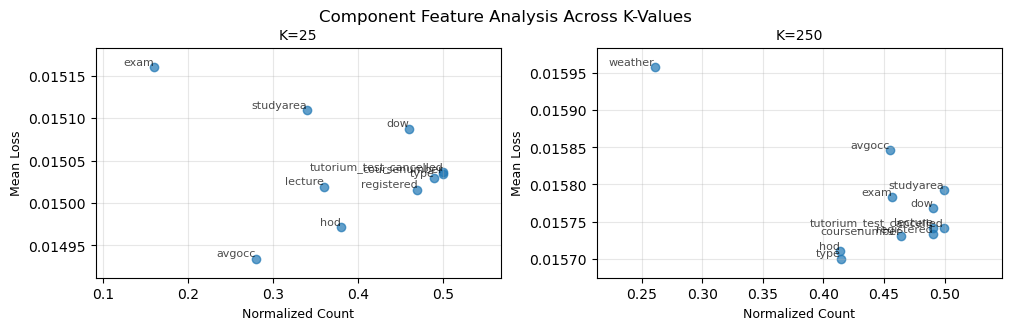

: 

In [ ]:
import matplotlib.pyplot as plt

def plot_count_vs_mean_loss_with_padding(df_list, k_values, filename="component_features_accross_K.png"):
    """
    Creates a grid layout with three subplots per row, plotting Count/K vs Mean Loss for each K value.
    Adjusted to include dynamic padding around points to keep annotations within the plot boundaries.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames, each containing 'features', 'mean_loss', 'std_loss', and 'count'.
        k_values (list of int): List of K values corresponding to each DataFrame in df_list.
        filename (str): Path and filename to save the figure.
    
    Returns:
        None
    """
    # Ensure inputs are valid
    if len(df_list) != len(k_values):
        raise ValueError("The number of DataFrames must match the number of K values.")

    # Calculate grid size
    num_plots = len(k_values)
    cols = 2  # Number of columns in the grid
    rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of single-row/column grids

    for i, (df, k) in enumerate(zip(df_list, k_values)):
        ax = axes[i]
        
        # Remove rows with NaN in "mean_loss"
        df = df.dropna(subset=["mean_loss"])
        
        # remove features == occrate
        n_value = df["count"].max()
        
        df = df[~df["features"].str.contains("occrate")]
        
        # Normalize 'count' column by dividing by k
        df["normalized_count"] = df["count"] / n_value

        # Determine axis limits with padding
        x_min, x_max = df["normalized_count"].min(), df["normalized_count"].max()
        y_min, y_max = df["mean_loss"].min(), df["mean_loss"].max()
        x_padding = (x_max - x_min) * 0.2  # 10% padding
        y_padding = (y_max - y_min) * 0.1  # 10% padding
        
        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Scatter plot
        ax.scatter(df["normalized_count"], df["mean_loss"], label=f"K={k}", alpha=0.7)
        
        # Annotate points
        for _, row in df.iterrows():
            ax.text(
                row["normalized_count"], row["mean_loss"], row["features"],
                fontsize=8, ha='right', va='bottom', alpha=0.7
            )
        
        # Customize each subplot
        ax.set_title(f"K={k}", fontsize=10)
        ax.set_xlabel("Normalized Count", fontsize=9)
        ax.set_ylabel("Mean Loss", fontsize=9)
        ax.grid(alpha=0.3)

    # Hide unused axes
    for ax in axes[num_plots:]:
        ax.axis('off')

    # Add suptitle
    plt.suptitle("Component Feature Analysis Across K-Values", fontsize=12, y=1.05)

    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



#N = 50    
#results_grouped_list = [analyzer.top_k_rows(df, "mean_loss", N, ascending=True) for df in results_list]
results_grouped_list = [analyzer.group_by_fundamental_features(df, "mean_loss") for df in results_list]

plot_count_vs_mean_loss_with_padding(results_grouped_list, k_values)


In [ ]:
df_component_features = results_list[0]

# top N component_features
df_top_50 = analyzer.top_k_rows(df_component_features, "mean_loss", 50, ascending=True)



: 

In [ ]:
# group by fundamental features
#df_top_50_fundamental_grouped = analyzer.group_by_fundamental_features(df_top_25, "mean_loss")

#df_top_50_fundamental_grouped

: 

In [ ]:
# df group by len_features -> does not make sense, too litle difference!
# I think this must be considered only in the context of trees
#df_len_features_grouped = df.groupby("len_features")
#for group, df_sub in df_len_features_grouped:
#    print(group)
#    df_sub_res = analyzer.group_by_fundamental_features(df_sub, "mean_loss").sort_values("mean_loss")
#    print(df_sub_res)

: 

In [ ]:
# get top 25 features
df_top_25 = analyzer.top_k_rows(df, "mean_loss", 25, ascending=True)

df_top_25_grouped = analyzer.group_by_fundamental_features(df_top_25, "mean_loss")
df_top_25_grouped

features  mean_loss  std_loss  count
0                   lecture   0.014703  0.000000      8
1                registered   0.014743  0.000037     21
2                      type   0.014750  0.000048     20
3                       hod   0.014757  0.000047     25
4                   occrate   0.014757  0.000047     25
5              coursenumber   0.014760  0.000050     13
6   tutorium_test_cancelled   0.014760  0.000050     13
7                    avgocc   0.014767  0.000044     21
8                       dow   0.014768  0.000000      8
9                      exam        NaN       NaN      0
10                studyarea        NaN       NaN      0
11                  weather        NaN       NaN      0

: 

In [ ]:
# relationship between count and mean_loss

import plotly.express as px

def scatter_plot_count_vs_mean_loss(df, title="Count vs Mean Loss", filename="scatter_plot.html"):
    """
    Creates a scatter plot using Plotly to visualize Count vs Mean Loss with features in hover data.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing 'count', 'mean_loss', and 'features' columns.
        title (str): Title of the plot.
        filename (str): Path and filename to save the figure as an interactive HTML file.
    
    Returns:
        None
    """
    # Create scatter plot
    fig = px.scatter(
        df,
        x="count",
        y="mean_loss",
        hover_data=["features"],
        title=title,
        labels={"count": "Count", "mean_loss": "Mean Loss"},
        template="plotly_white"
    )
    
    # Update layout for better readability
    fig.update_layout(
        height=600,
        width=800,
        title_x=0.5,
        margin=dict(l=50, r=50, t=50, b=50)
    )
    
    # Save the plot as an interactive HTML file
    #fig.write_html(filename + ".html")
    # save as png
    fig.write_image(filename + ".png")
    
    # Show the plot in the browser
    fig.show()

# Example usage:
# scatter_plot_count_vs_mean_loss(print_df, title="Simple Scatter Plot of Count vs Mean Loss", filename="scatter_plot.html")
scatter_plot_count_vs_mean_loss(df, title="Simple Scatter Plot of Count vs Mean Loss", filename="scatter_plot")

: 

In [ ]:
# group by feature results
df_component_grouped = analyzer.group_by_component_features(df_feature_grouped, "mean_loss")

import pandas as pd
pd.set_option('display.max_colwidth', 100)

df_print = df_component_grouped.copy(deep = True)

df_print["features"] = df_print["features"].apply(lambda x: x.split(","))
df_print.sort_values("mean_loss").head(10)

features  \
0                 [coursenumber, dow, hod, occrate, registered, tutorium_test_cancelled, type]   
1  [coursenumber, dow, lecture, occrate, registered, studyarea, tutorium_test_cancelled, type]   
2                      [coursenumber, dow, occrate, registered, tutorium_test_cancelled, type]   
3           [coursenumber, dow, occrate, registered, studyarea, tutorium_test_cancelled, type]   
4       [coursenumber, lecture, occrate, registered, studyarea, tutorium_test_cancelled, type]   
5     [coursenumber, dow, exam, occrate, registered, studyarea, tutorium_test_cancelled, type]   
6  [coursenumber, hod, lecture, occrate, registered, studyarea, tutorium_test_cancelled, type]   
7      [coursenumber, dow, hod, occrate, registered, studyarea, tutorium_test_cancelled, type]   
8             [coursenumber, dow, lecture, occrate, registered, tutorium_test_cancelled, type]   
9                [coursenumber, occrate, registered, studyarea, tutorium_test_cancelled, type]   

   mean_loss  std_loss  count  
0   0.016111  0.000657     32  
1   0.016125  0.000591     16  
2   0.016125  0.000616     64  
3   0.016136  0.000523     32  
4   0.016145  0.000600     32  
5   0.016148  0.000575     16  
6   0.016173  0.000652     16  
7   0.016181  0.000560     16  
8   0.016186  0.000627     32  
9   0.016189  0.000586     64

: 

In [ ]:
import networkx as nx
import plotly.graph_objects as go

def plot_tree_with_plotly_from_graph(G, title="Tree Plot", output_file="tree_plot.html"):
    """
    Plots a tree structure using Plotly based on a pre-built graph.

    Parameters:
        G (networkx.DiGraph): A directed graph representing the tree structure.
        title (str): Title of the plot.
        output_file (str): Path to save the plot as an interactive HTML file.

    Returns:
        None
    """
    # Get positions for the tree layout
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot")

    # Prepare data for Plotly
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"Node: {node}<br>Mean Loss: {G.nodes[node]['mean_loss']:.6f}")

    # Create the Plotly figure
    fig = go.Figure()

    # Add edges
    fig.add_trace(
        go.Scatter(
            x=edge_x,
            y=edge_y,
            mode="lines",
            line=dict(width=1, color="gray"),
            hoverinfo="none"
        )
    )

    # Add nodes
    fig.add_trace(
        go.Scatter(
            x=node_x,
            y=node_y,
            mode="markers",
            marker=dict(size=10, color="blue"),
            text=node_text,
            hoverinfo="text"
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        showlegend=False
    )

    # Save the figure as an HTML file
    fig.write_html(output_file)

    # Show the figure
    fig.show()


: 

### Code to print group by fundamental features tables

In [ ]:
df_fundamental_grouped = analyzer.group_by_fundamental_features(df_feature_grouped, "mean_loss")
df_fundamental_grouped.set_index("features", inplace=True)

df_fundamental_grouped.sort_values("mean_loss")

mean_loss  std_loss  count
features                                           
coursenumber              0.016635  0.000684   1024
studyarea                 0.016653  0.000559   1024
registered                0.016774  0.000774   1024
type                      0.016785  0.000791   1024
lecture                   0.016828  0.000774   1024
tutorium_test_cancelled   0.016857  0.000995   1024
hod                       0.016884  0.000887   1024
dow                       0.016902  0.000854   1024
occrate                   0.016935  0.000920   2048
avgocc                    0.016939  0.000779   1024
weather                   0.017208  0.000719   1024
exam                      0.017271  0.000857   1024

: 

In [ ]:
K = 25
df_in = analyzer.top_k_rows(df_feature_grouped, "mean_loss", K, True)
df_fundamental_grouped = analyzer.group_by_fundamental_features(df_in, "mean_loss")
df_fundamental_grouped.set_index("features", inplace=True)

df_fundamental_grouped.sort_values("mean_loss")

mean_loss  std_loss  count
features                                           
avgocc                    0.014952  0.000184     14
hod                       0.014984  0.000169     13
registered                0.014990  0.000169     16
type                      0.014991  0.000169     21
coursenumber              0.014998  0.000161     24
occrate                   0.015004  0.000161     25
tutorium_test_cancelled   0.015004  0.000161     25
lecture                   0.015027  0.000146     12
studyarea                 0.015090  0.000085      6
dow                       0.015091  0.000124      9
exam                      0.015154  0.000011      2
weather                        NaN       NaN      0

: 

In [ ]:
import matplotlib.pyplot as plt

def generate_k_values_dataframe(dataframe, sort_column, K_values, ascending=True):

    results = []

    for K in K_values:
        # Filter top K rows
        df_in = analyzer.top_k_rows(dataframe, sort_column, K, ascending)
        
        # Group by fundamental features
        df_fundamental_grouped = analyzer.group_by_fundamental_features(df_in, sort_column)

        # Store results in the dictionary
        results.append(df_fundamental_grouped)
        

    # Combine all results into a single DataFrame
    return results


: 

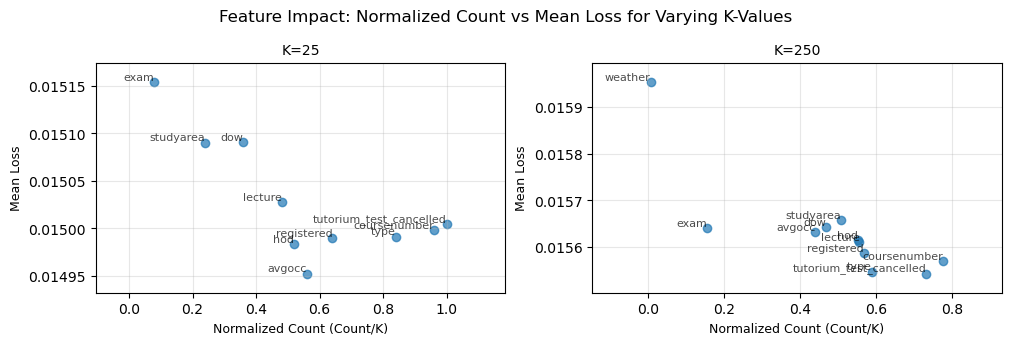

: 

In [ ]:
def plot_count_vs_mean_loss_with_padding(df_list, k_values, filename="fundamental_features_accross_k.png"):
    """
    Creates a grid layout with three subplots per row, plotting Count/K vs Mean Loss for each K value.
    Adjusted to include dynamic padding around points to keep annotations within the plot boundaries.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames, each containing 'features', 'mean_loss', 'std_loss', and 'count'.
        k_values (list of int): List of K values corresponding to each DataFrame in df_list.
        filename (str): Path and filename to save the figure.
    
    Returns:
        None
    """
    # Ensure inputs are valid
    if len(df_list) != len(k_values):
        raise ValueError("The number of DataFrames must match the number of K values.")

    # Calculate grid size
    num_plots = len(k_values)
    cols = 2  # Number of columns in the grid
    rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of single-row/column grids

    for i, (df, k) in enumerate(zip(df_list, k_values)):
        ax = axes[i]
        
        # Remove rows with NaN in "mean_loss"
        df = df.dropna(subset=["mean_loss"])
        
        # remove features == occrate
        df = df[~df["features"].str.contains("occrate")]
        
        # Normalize 'count' column by dividing by k
        df["normalized_count"] = df["count"] / k

        # Determine axis limits with padding
        x_min, x_max = df["normalized_count"].min(), df["normalized_count"].max()
        y_min, y_max = df["mean_loss"].min(), df["mean_loss"].max()
        x_padding = (x_max - x_min) * 0.2  # 10% padding
        y_padding = (y_max - y_min) * 0.1  # 10% padding
        
        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Scatter plot
        ax.scatter(df["normalized_count"], df["mean_loss"], label=f"K={k}", alpha=0.7)
        
        # Annotate points
        for _, row in df.iterrows():
            ax.text(
                row["normalized_count"], row["mean_loss"], row["features"],
                fontsize=8, ha='right', va='bottom', alpha=0.7
            )
        
        # Customize each subplot
        ax.set_title(f"K={k}", fontsize=10)
        ax.set_xlabel("Normalized Count (Count/K)", fontsize=9)
        ax.set_ylabel("Mean Loss", fontsize=9)
        ax.grid(alpha=0.3)

    # Hide unused axes
    for ax in axes[num_plots:]:
        ax.axis('off')

    # Add suptitle
    plt.suptitle("Feature Impact: Normalized Count vs Mean Loss for Varying K-Values", fontsize=12, y=1.1)

    # Save the figure
    plt.savefig("top-25vstop250", dpi=300, bbox_inches="tight")
    plt.show()

    
k_values = [25, 250]
results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)

plot_count_vs_mean_loss_with_padding(results_list, k_values)


In [ ]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import plotly.io as pio

#def plot_count_vs_mean_loss_plotly_optimized(df_list, k_values, filename_html="count_vs_mean_loss_plotly_optimized.html", filename_png="count_vs_mean_loss_plotly_optimized.png"):
#    """
#    Creates a grid layout with three subplots per row, plotting Count/K vs Mean Loss for each K value using Plotly.
#    Optimized spacing between plots, annotated axes, and saved as both PNG and HTML.
    
#    Parameters:
#        df_list (list of pd.DataFrame): List of DataFrames, each containing 'features', 'mean_loss', 'std_loss', and 'count'.
#        k_values (list of int): List of K values corresponding to each DataFrame in df_list.
#        filename_html (str): Path and filename to save the figure as an interactive HTML file.
#        filename_png (str): Path and filename to save the figure as a static PNG file.
    
#    Returns:
#        None
#    """
#    # Calculate grid size
#    num_plots = len(k_values)
#    cols = 3  # Number of columns in the grid
#    rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

#    # Create subplots
#    fig = make_subplots(
#        rows=rows,
#        cols=cols,
#        subplot_titles=[f"K={k}" for k in k_values],
#        horizontal_spacing=0.1,  # Reduce space between columns
#        vertical_spacing=0.15  # Reduce space between rows
#    )

#    for i, (df, k) in enumerate(zip(df_list, k_values)):
#        row, col = divmod(i, cols)
#        row += 1  # Plotly rows are 1-indexed, not 0-indexed
#        col += 1  # Plotly columns are 1-indexed, not 0-indexed
        
#        # Remove rows with NaN in "mean_loss"
#        df = df.dropna(subset=["mean_loss"])
        
#        # Normalize 'count' column by dividing by k
#        df["normalized_count"] = df["count"] / k

#        # Determine axis limits with padding
#        x_min, x_max = df["normalized_count"].min(), df["normalized_count"].max()
#        y_min, y_max = df["mean_loss"].min(), df["mean_loss"].max()
#        x_padding = (x_max - x_min) * 0.2  # 10% padding
#        y_padding = (y_max - y_min) * 0.2  # 10% padding

#        # Add scatter plot
#        fig.add_trace(
#            go.Scatter(
#                x=df["normalized_count"],
#                y=df["mean_loss"],
#                mode="markers+text",
#                text=df["features"],
#                textposition="top center",
#                marker=dict(size=10, opacity=0.7),
#                name=f"K={k}"
#            ),
#            row=row, col=col
#        )
        
#        # Set axis ranges with padding
#        fig.update_xaxes(
#            range=[x_min - x_padding, x_max + x_padding],
#            title_text="Normalized Count (Count/K)",
#            row=row, col=col
#        )
#        fig.update_yaxes(
#            range=[y_min - y_padding, y_max + y_padding],
#            title_text="Mean Loss",
#            row=row, col=col
#        )

#    # Update layout
#    fig.update_layout(
#        height=300 * rows,
#        width=1200,
#        title_text="Feature Impact: Normalized Count vs Mean Loss for Varying K-Values",
#        title_x=0.5,
#        showlegend=False
#    )

#    # Save the figure as both an interactive HTML file and a static PNG file
#    fig.write_html(filename_html)
#    pio.write_image(fig, filename_png, width=1200, height=300 * rows, scale=2)

#    # Show the plot in a browser
#    fig.show()


#k_values = [10, 25, 50, 100, 250]
#results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)

#plot_count_vs_mean_loss_plotly_optimized(results_list, k_values)


: 

In [ ]:
#import plotly.graph_objects as go


#def process_and_plot_plotly(df_feature_grouped, K_values, sort_column, ascending=True):
#    """
#    Process the DataFrame for various K values and create an interactive line plot using Plotly,
#    with feature combinations as individual lines.

#    Parameters:
#    df_feature_grouped: DataFrame with feature combinations and metrics.
#    K_values: List of K values to filter the top rows.
#    sort_column: The column to sort by (e.g., "mean_loss").
#    ascending: Sort order for the sort_column (default is True).

#    Returns:
#    A DataFrame with fundamental features, K values, and metrics.
#    """
    
#    # Initialize a dictionary to store results
#    results = {}

#    for K in K_values:
#        # Filter top K rows
#        df_in = analyzer.top_k_rows(df_feature_grouped, sort_column, K, ascending)
        
#        # Group by fundamental features
#        df_fundamental_grouped = analyzer.group_by_fundamental_features(df_in, sort_column)

#        # Store results in the dictionary
#        results[K] = df_fundamental_grouped.set_index("features")[sort_column]
        

#    # Combine all results into a single DataFrame
#    results_df = pd.DataFrame(results).reset_index()

#    # Copy the results DataFrame for further processing
#    df = results_df.copy()

#    # Create the Plotly figure
#    fig = go.Figure()
        
#    # Add a trace for each feature combination
#    for _, row in df.iterrows():
#        #order_dict = dict()
#        order = []
#        for k in K_values:
#            # Calculate ranks for the specific K value
#            sorted_df = df[[k]].sort_values(by=k, ascending=ascending).reset_index()
#            #order_dict[k] = int(sorted_df[sorted_df["index"] == row.name].index[0]) + 1
#            order.append(int(sorted_df[sorted_df["index"] == row.name].index[0]) + 1)

#        # Add trace with hover info including rank
#        fig.add_trace(go.Scatter(
#            x=K_values,
#            y=row[1:],
#            mode='lines+markers',
#            name=row['features'],
#            customdata=order,
#            hovertemplate=(
#                f"<b>Feature:</b> {row['features']}<br>"+
#                "<b>K:</b> %{x}<br>"+
#                "<b>Rank:</b> %{customdata}<br>"+
#                f"<b>{sort_column}:</b>" + " %{y:.6f}<extra></extra>"
#            ),
#        ))


#    # Update layout for better visualization
#    fig.update_layout(
#        title=f"{sort_column} vs K (Interactive)",
#        xaxis_title="K (Top Rows Considered)",
#        yaxis_title=sort_column,
#        legend_title="Features",
#        template="plotly_white",
#        margin=dict(l=50, r=50, t=50, b=50),
#        height=800,  # Increased plot height
#    )

#    # Show the interactive plot
#    fig.show()

#    return df

    
#k_values = [10, 25, 50, 100, 250]
#results_list = generate_k_values_dataframe(df_feature_grouped, "mean_loss", k_values)

#process_and_plot_plotly(results_list, k_values)

: 

### Code to print group by feature tables

In [ ]:

# group by feature results
import pandas as pd
pd.set_option('display.max_colwidth', 100)

df_print = df_feature_grouped.copy(deep = True)
df_print["features"] = df_print["features"].apply(lambda x: x.split("_"))
# rename features to feature_combination
df_print.rename(columns={"features": "feature_combination"}, inplace=True)


df_print.sort_values("mean_loss", ascending=True).head(5)

feature_combination  \
0  [occrate, avgocc, coursenumber, hod, tutorium, test, cancelled, type, registered, lecture]   
1                [occrate, avgocc, coursenumber, tutorium, test, cancelled, type, registered]   
2                            [occrate, avgocc, coursenumber, tutorium, test, cancelled, type]   
3      [occrate, avgocc, coursenumber, dow, hod, tutorium, test, cancelled, type, registered]   
4           [occrate, avgocc, coursenumber, hod, tutorium, test, cancelled, type, registered]   

   mean_loss  std_loss  
0   0.014703  0.000416  
1   0.014737  0.000294  
2   0.014757  0.000180  
3   0.014768  0.000221  
4   0.014773  0.000337

: 

: 

In [ ]:
# in df_not_grouped locate the feature with the highest std

#1. get the feature with the highest std in df_grouped_by_features
#2. get the all runs of said feature in df_not_grouped
high_std_feature = df_feature_grouped.sort_values("std_loss", ascending=True)[:1]["features"].values[0]

df_high_std_feature = df_not_grouped[df_not_grouped["features"] == high_std_feature]
df_high_std_feature.sort_values("test_loss", ascending=True)

index                                        features  run_id  test_loss
7037   7037  occrate_coursenumber_type_registered_studyarea       2   0.015533
7035   7035  occrate_coursenumber_type_registered_studyarea       0   0.015571
7038   7038  occrate_coursenumber_type_registered_studyarea       3   0.015614
7036   7036  occrate_coursenumber_type_registered_studyarea       1   0.015657
7039   7039  occrate_coursenumber_type_registered_studyarea       4   0.015673

: 

In [ ]:
# not really applicable for that many combinations

#import seaborn as sns

## Convert feature analysis to a DataFrame if not already
#heatmap_data = df_features_and_combs[['mean_validation_mae', 'mean_test_mae']]
#sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm")
#plt.title("Performance of Individual Features")
#plt.show()


: 

In [ ]:
#from pandas.plotting import parallel_coordinates

## not really applicable for that many combinations

#top_combinations = df_grouped.nsmallest(100, 'mean_test_mae')  # Top 100 combinations
#parallel_data = top_combinations.melt(id_vars='features', value_vars=['mean_validation_mae', 'std_validation_mae', 'mean_test_mae', 'std_test_mae'])

## Pivot the melted data back to wide format
#wide_data = parallel_data.pivot(index='features', columns='variable', values='value').reset_index()

## Plot parallel coordinates
#parallel_coordinates(wide_data, 'features', color=['blue', 'green', 'red', 'purple'])
#plt.title("Parallel Coordinates Plot for Feature Combinations")
#plt.show()

: 

In [ ]:
# not really applicable for that many combinations

#df_features_and_combs[['mean_validation_mae', 'mean_test_mae']].plot.bar(
#    yerr=df_features_and_combs[['std_validation_mae', 'std_test_mae']].values.T,
#    figsize=(10, 6),
#    capsize=4,
#    title="Mean and Std of MAE for Individual Features"
#)
#plt.show()


: 

In [ ]:
## Split the strings into lists of fundamental features
#fundamental_features = ["occrate", "exam", "tutorium_test_cancelled", "registered", "type", 
#                    "studyarea", "coursenumber", "dow", "hod", "weather", "avgocc"]
## Function to split strings into fundamental features
#def extract_fundamental_features(feature_string, fundamental_features):
#    # Split the string by underscore and filter for fundamental features
#    return [f for f in fundamental_features if f in feature_string]
#df["fundamental_features"] = df["features"].apply(lambda x: extract_fundamental_features(x, fundamental_features))
#print(df['fundamental_features'])

: 

In [ ]:
df_plot = df_feature_grouped.copy(deep=True)

# get benchmark row for comparison
benchmark = df_plot[df_plot["features"] == "occrate"]

df_plot["mean_test_mae"] = benchmark["mean_test_mae"].values[0] - df_plot["mean_test_mae"]

: 

In [ ]:
analyzer.scatter_plot_feature_group(df_plot)

: 

## Correlation

In [ ]:
# no benchmark possible -> correlation coef is invariant to scale and location changes

#target_column = "test_loss"
target_column = "mean_test_mae"
dataframe = df_feature_grouped
correlations = analyzer.correlate_features_with_loss(dataframe, target_column)
print(correlations.sort_values(ascending=False))

exam                       0.364959
weather                    0.296115
avgocc                     0.004425
dow                       -0.035987
hod                       -0.055513
tutorium_test_cancelled   -0.084838
type                      -0.162839
registered                -0.174820
studyarea                 -0.306186
coursenumber              -0.326157
occrate                         NaN
dtype: float64


: 

## Marginal Contribution

In [ ]:
def calc_marginal_contribution(dataframe, feature, target):
    with_feature = dataframe[dataframe['features'].str.contains(feature)]
    without_feature = dataframe[~dataframe['features'].str.contains(feature)]
    return with_feature[target].mean() - without_feature[target].mean()
    
    
df = df_feature_grouped
target = "mean_test_mae" 
#for feature in all_features:
for feature in analyzer.fundamental_features:
    impact = calc_marginal_contribution(df, feature, "mean_test_mae")
    print(f"Impact of {feature}: {impact:.6f}")

Impact of occrate: nan
Impact of exam: 0.000672
Impact of tutorium_test_cancelled: -0.000156
Impact of registered: -0.000322
Impact of type: -0.000300
Impact of studyarea: -0.000564
Impact of coursenumber: -0.000600
Impact of dow: -0.000066
Impact of hod: -0.000102
Impact of weather: 0.000545
Impact of avgocc: 0.000008


: 

In [ ]:
# not so useful --> gets washed out by the number of features
# averaging over so many features is not so important
df = df_feature_grouped
target = "mean_test_mae"

for feature in analyzer.fundamental_features:
    benchmark_improvement = analyzer.calc_benchmark_improvement(df, feature, target).sort_values(feature)
    print(f"{feature}: {benchmark_improvement["improvement"].values}")

occrate: [0.00439245]
exam: [0.00472829 0.00405661]
tutorium_test_cancelled: [0.00431438 0.00447052]
registered: [0.00423158 0.00455332]
type: [0.00424261 0.0045423 ]
studyarea: [0.0041107 0.0046742]
coursenumber: [0.00409232 0.00469258]
dow: [0.00435934 0.00442557]
hod: [0.00434137 0.00444353]
weather: [0.00466494 0.00411996]
avgocc: [0.00439652 0.00438838]


: 

In [ ]:
dataframe = df_feature_grouped
target = "mean_test_mae"
feature = "tutorium_test_cancelled"
feature_inclusion, impact = analyzer.calc_feature_inclusion(dataframe, feature, target)

tutorium_test_cancelled      mean       std
0                    False  0.017013  0.000833
1                     True  0.016857  0.000995

: 

## Linear Regression and Model agnostic 

In [ ]:
dataframe

features  mean_validation_mae  \
343   occrate_avgocc_coursenumber_hod_tutorium_test_...             0.008524   
373   occrate_avgocc_coursenumber_tutorium_test_canc...             0.008143   
370   occrate_avgocc_coursenumber_tutorium_test_canc...             0.008034   
23    occrate_avgocc_coursenumber_dow_hod_tutorium_t...             0.008305   
342   occrate_avgocc_coursenumber_hod_tutorium_test_...             0.008658   
...                                                 ...                  ...   
1537                                        occrate_dow             0.014428   
1602                                   occrate_exam_dow             0.014153   
1577                occrate_dow_tutorium_test_cancelled             0.014771   
2024            occrate_weather_tutorium_test_cancelled             0.015426   
1920                                    occrate_weather             0.016372   

      std_validation_mae  mean_test_mae  std_test_mae   exam  \
343             0.000284       0.014703      0.000416  False   
373             0.000112       0.014737      0.000294  False   
370             0.000223       0.014757      0.000180  False   
23              0.000300       0.014768      0.000221  False   
342             0.000327       0.014773      0.000337  False   
...                  ...            ...           ...    ...   
1537            0.000293       0.021907      0.000541  False   
1602            0.000315       0.022002      0.001008   True   
1577            0.000536       0.022033      0.000623  False   
2024            0.000359       0.022208      0.000491  False   
1920            0.000479       0.022267      0.000927  False   

      tutorium_test_cancelled  occrate  registered   type  studyarea  \
343                      True     True        True   True      False   
373                      True     True        True   True      False   
370                      True     True       False   True      False   
23                       True     True        True   True      False   
342                      True     True        True   True      False   
...                       ...      ...         ...    ...        ...   
1537                    False     True       False  False      False   
1602                    False     True       False  False      False   
1577                     True     True       False  False      False   
2024                     True     True       False  False      False   
1920                    False     True       False  False      False   

      coursenumber    dow    hod  weather  avgocc  
343           True  False   True    False    True  
373           True  False  False    False    True  
370           True  False  False    False    True  
23            True   True   True    False    True  
342           True  False   True    False    True  
...            ...    ...    ...      ...     ...  
1537         False   True  False    False   False  
1602         False   True  False    False   False  
1577         False   True  False    False   False  
2024         False  False  False     True   False  
1920         False  False  False     True   False  

[2048 rows x 16 columns]

: 

In [ ]:
dataframe = df_feature_grouped
target = "mean_test_mae"
#target = "std_test_mae"

y_true = dataframe[target]

: 

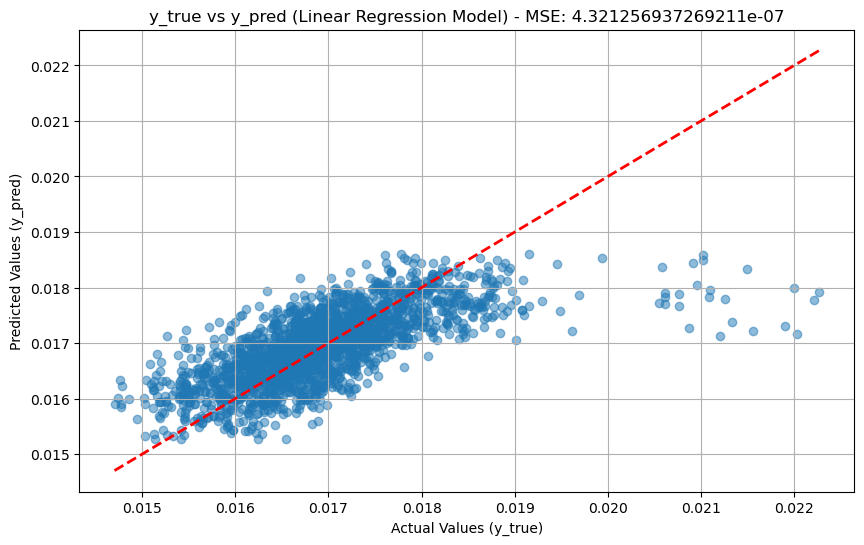

: 

In [ ]:
reg_results, model, y_pred = analyzer.calc_linear_regression(dataframe, target, intercept=False)
analyzer.scatter_plot_target_prediction("Linear Regression Model", y_true, y_pred)

import shap


model, y_pred = analyzer.calc_decision_tree(dataframe, target)
analyzer.scatter_plot_target_prediction("Decision Tree Model", y_true, y_pred)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_set = analyzer.get_binary_features(dataframe)
shap_values = explainer(shap_set)

# Summary plot for SHAP values
shap.summary_plot(shap_values, shap_set)

In [ ]:
import shap
X = analyzer.get_binary_features(dataframe)
X_shap = shap.utils.sample(X, len(X)//5)

: 

In [ ]:
# check reference
explainer = shap.LinearExplainer(model, X_shap)
shap_values = explainer(X)

: 

In [ ]:
#explainer = shap.Explainer(model.predict, X_shap)
#shap_values = explainer(X)
reg_results.sort_values()

coursenumber              -0.000600
studyarea                 -0.000564
registered                -0.000322
type                      -0.000300
tutorium_test_cancelled   -0.000156
hod                       -0.000102
dow                       -0.000066
avgocc                     0.000008
weather                    0.000545
exam                       0.000672
occrate                    0.017378
dtype: float64

: 

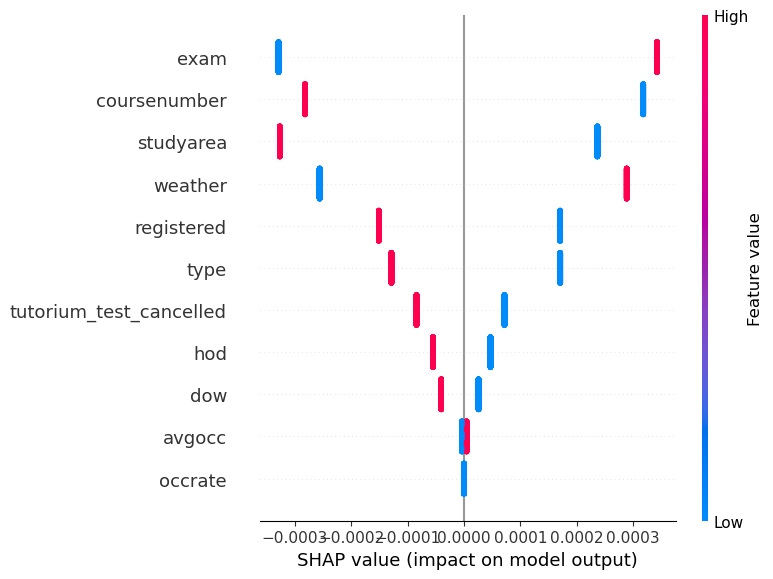

: 

In [ ]:
shap.summary_plot(shap_values, X)

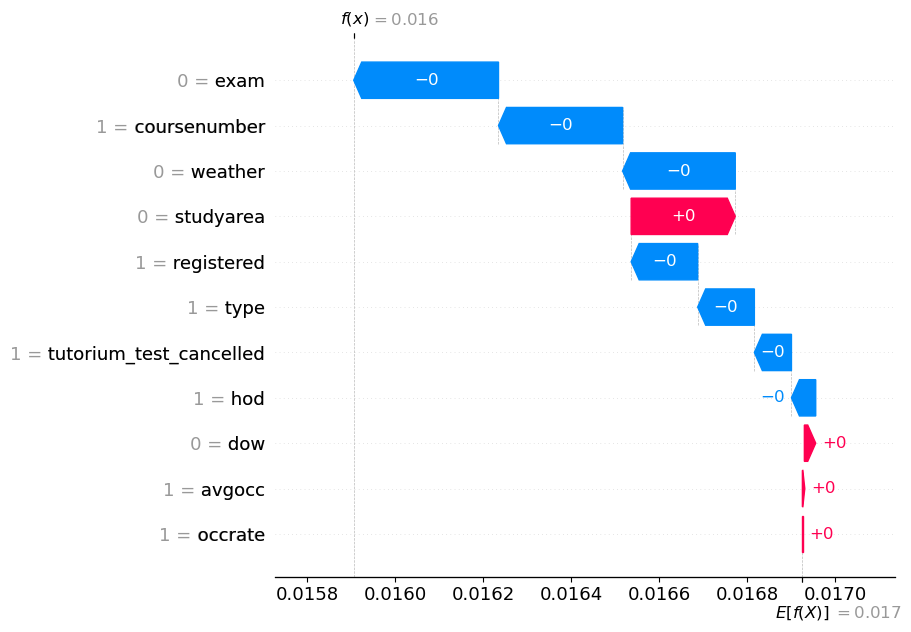

: 

In [ ]:
# explains one sample --> sadly precision is a little bit too little
shap.plots.waterfall(shap_values[0], max_display=14)

In [ ]:

explainer = shap.Explainer(model.predict, X_shap)
shap_values = explainer(X)

: 

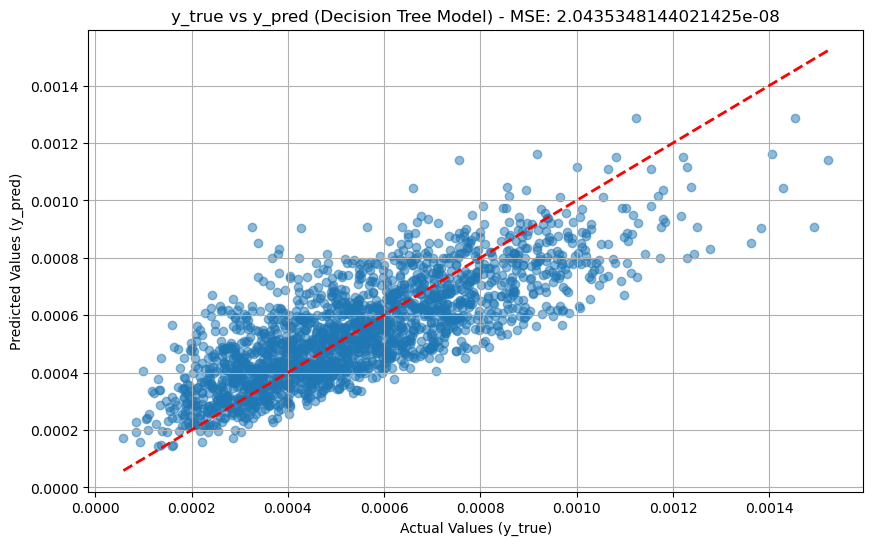

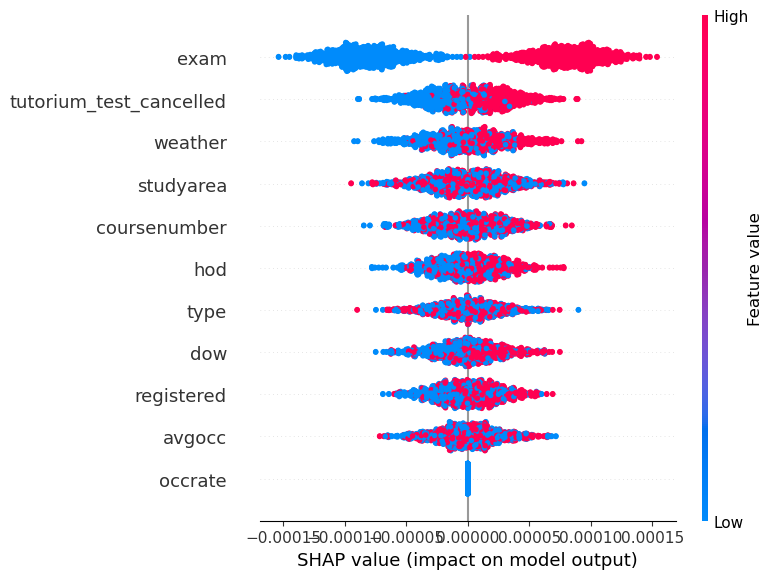

: 

In [ ]:
import shap


model, y_pred = analyzer.calc_decision_tree(dataframe, target)
analyzer.scatter_plot_target_prediction("Decision Tree Model", y_true, y_pred)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_set = analyzer.get_binary_features(dataframe)
shap_values = explainer(shap_set)

# Summary plot for SHAP values
shap.summary_plot(shap_values, shap_set)

## Not really consider

Explain model hard to interpret with model hard to interpret 
--> not nice

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the neural network
class MLPRegressorPyTorch(nn.Module):
    def __init__(self, input_size, hidden_1, hidden_2, output_size):
        super(MLPRegressorPyTorch, self).__init__()
        
        self.hidden_1 = nn.Linear(input_size, hidden_1)
        
        #self.hidden_2 = nn.Linear(hidden_1, hidden_2)
        self.relu = nn.ReLU()
        
        self.output = nn.Linear(hidden_1, output_size)

    def forward(self, x):
        x = self.hidden_1(x)
        x = self.relu(x)
        #x = self.hidden_2(x)
        #x = self.relu(x)
        x = self.output(x)
        return x

: 

In [ ]:

target = "mean_test_mae"
# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 200
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)

X = analyzer.get_binary_features(dataframe)
y = dataframe[target]

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
input_size = X.shape[1]
output_size = 1

model = MLPRegressorPyTorch(input_size, 100, 1, output_size)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # Forward pass
        batch_X = batch_X.to(device)
        
        predictions = model(batch_X)
        predictions = predictions.to("cpu")
        
        loss = criterion(predictions, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Optional: print progress every 50 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
model.to("cpu")
with torch.no_grad():
    y_pred_tensor = model(X_tensor)
    y_pred_mlp = y_pred_tensor.numpy()


mse_mlp = criterion(y_tensor, y_pred_tensor)
print("MLP - Improved MSE:", mse_mlp)


Epoch 10/200, Loss: 9.696935165948162e-08
Epoch 20/200, Loss: 4.612630721823052e-09
Epoch 30/200, Loss: 1.1002003752480505e-08
Epoch 40/200, Loss: 7.96169974393024e-09
Epoch 50/200, Loss: 7.973555682383449e-08
Epoch 60/200, Loss: 3.0937377104578445e-09
Epoch 70/200, Loss: 3.3893432060949635e-08
Epoch 80/200, Loss: 3.427927808274944e-08
Epoch 90/200, Loss: 1.8672043466949617e-08
Epoch 100/200, Loss: 2.3176853858331015e-07
Epoch 110/200, Loss: 1.7941084706762922e-07
Epoch 120/200, Loss: 5.6940688608619894e-08


KeyboardInterrupt: 

: 

In [ ]:
# Evaluate the model
model.eval()
model.to("cpu")
with torch.no_grad():
    y_pred_tensor = model(X_tensor)
    y_pred_mlp = y_pred_tensor.numpy()


mse_mlp = criterion(y_tensor, y_pred_tensor)
print("MLP - Improved MSE:", mse_mlp)


MLP - Improved MSE: tensor(6.8843e-08)


: 

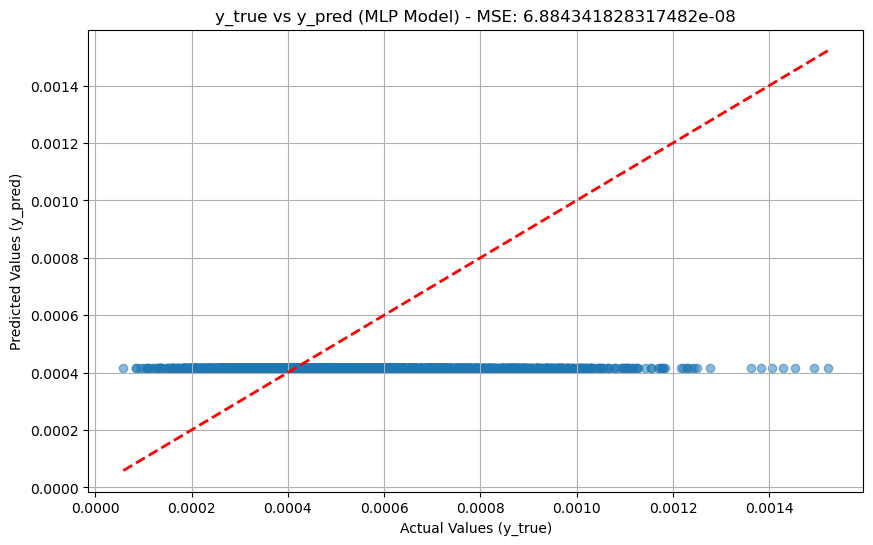

: 

In [ ]:
analyzer.scatter_plot_target_prediction("MLP Model", y_true, y_pred_mlp)

### Gridsearch

MLP - Best Parameters: {'alpha': 0, 'batch_size': 8, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.0001, 'max_iter': 3000}
MLP - Improved MSE: 0.0003346691718070262


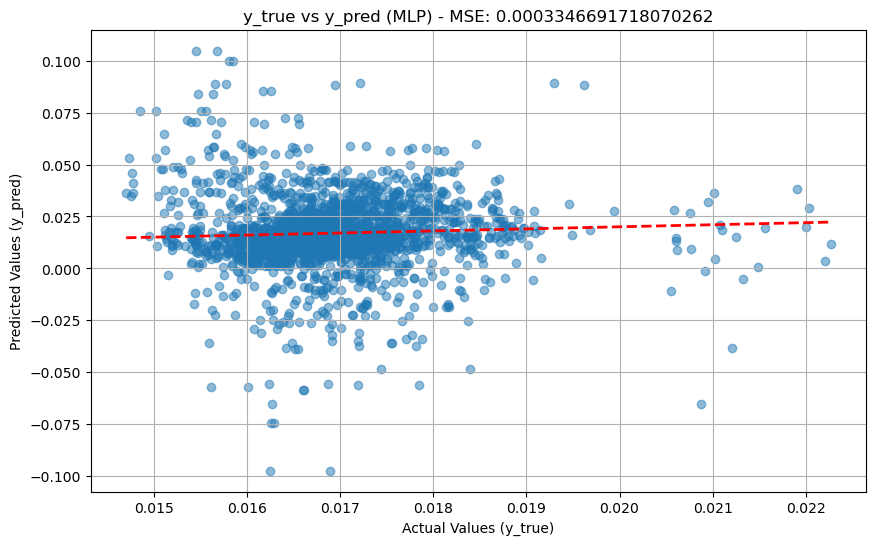

: 

In [ ]:
# Small MLP - Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    "hidden_layer_sizes": [(10)],
    "learning_rate_init": [0.0001],
    "batch_size": [8],
    "alpha": [0],
    "max_iter": [3000]
}

grid_search_mlp = GridSearchCV(MLPRegressor(activation="relu", solver="adam", random_state=42), param_grid_mlp, cv=5, scoring="neg_mean_squared_error")
grid_search_mlp.fit(X, y)

best_mlp = grid_search_mlp.best_estimator_
print("MLP - Best Parameters:", grid_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X)
mse_mlp = mean_squared_error(y, y_pred_mlp)
print("MLP - Improved MSE:", mse_mlp)

analyzer.scatter_plot_target_prediction("MLP", y, y_pred_mlp)

### Explanation of Correlation

Why `occrate` is NaN

====================

- The `occrate` column in `binary_features` is constant (all 1s):

  occrate

  1

  1

  1

  1



- A constant feature has zero variance (σ_X = 0).

- In Pearson's correlation formula:

  r = Cov(X, Y) / (σ_X ⋅ σ_Y)

  The denominator (σ_X) becomes zero, and the correlation cannot be computed, resulting in `NaN`.



Calculation for `avgocc`

=========================

We calculate the correlation for `avgocc` as an example.



Values:

-------

- X = [0, 1, 1, 0] (from `binary_features['avgocc']`)

- Y = [0.012485, 0.012285, 0.013611, 0.014393] (from `target_metrics`)



Step 1: Compute Means

---------------------

X̄ = (0 + 1 + 1 + 0) / 4 = 0.5

Ȳ = (0.012485 + 0.012285 + 0.013611 + 0.014393) / 4 = 0.013194



Step 2: Compute Deviations

--------------------------

X_i - X̄ = [-0.5, 0.5, 0.5, -0.5]

Y_i - Ȳ = [0.012485 - 0.013194, 0.012285 - 0.013194, 0.013611 - 0.013194, 0.014393 - 0.013194]

        = [-0.000709, -0.000909, 0.000417, 0.001199]



Step 3: Compute Covariance

--------------------------

Cov(X, Y) = Σ (X_i - X̄)(Y_i - Ȳ)

          = (-0.5)(-0.000709) + (0.5)(-0.000909) + (0.5)(0.000417) + (-0.5)(0.001199)

          = 0.000354 - 0.000455 + 0.000208 - 0.000599 = -0.000492



Step 4: Compute Variances

-------------------------

σ_X² = Σ (X_i - X̄)² = (-0.5)² + (0.5)² + (0.5)² + (-0.5)² = 1.0

σ_Y² = Σ (Y_i - Ȳ)²

      = (-0.000709)² + (-0.000909)² + (0.000417)² + (0.001199)²

      = 0.000000503 + 0.000000826 + 0.000000174 + 0.000001438 = 0.000002941



σ_X = √1.0 = 1.0

σ_Y = √0.000002941 = 0.001715



Step 5: Compute Correlation

---------------------------

r = Cov(X, Y) / (σ_X ⋅ σ_Y)

r = -0.000492 / (1.0 ⋅ 0.001715) = -0.286


# Impact of one Feature

Measuring the impact of a single feature, even when it appears in combination with others, can be approached by isolating its contribution to the model's performance. Here’s a systematic way to assess the impact of individual features:

Approach 1: Marginal Contribution (Shapley Value Inspired)

    Baseline Performance: Compute the average performance (e.g., mean validation MAE) for all combinations without the feature.
    With Feature Performance: Compute the average performance for all combinations with the feature.
    Impact: Measure the difference in average performance:
    Impact=Mean(MAE without feature)−Mean(MAE with feature)
    Impact=Mean(MAE without feature)−Mean(MAE with feature)
        A positive impact indicates the feature improves performance.
        A negative impact indicates the feature worsens performance.

Approach 2: Statistical Comparison

## Check statistics slides!! must it be standard normal?

# We need larger smaple check servers!!

Perform a statistical test to compare the performance of combinations with and without the feature:

    Null Hypothesis: The feature does not improve performance (mean performance is the same with or without it).
    Use a t-test or Mann-Whitney U test to compare performance distributions.

In [ ]:
#from scipy.stats import ttest_ind

#dataframe = df_grouped_by_features
#feature = "exam"
#target = "mean_test_mae"

#with_feature = dataframe[dataframe['features'].str.contains(feature)]
#without_feature = dataframe[~dataframe['features'].str.contains(feature)]

## Extract performance distributions
#with_performance = with_feature[target]
#without_performance = without_feature[target]

## Perform t-test
##print(df_grouped_by_features)
#t_stat, p_value = ttest_ind(with_performance, without_performance, equal_var=False)
#print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


: 

In [ ]:
## Try mann-whitney u test
#from scipy.stats import mannwhitneyu

#dataframe = df_grouped_by_features
#feature = "exam"
#target = "mean_test_mae"

## Separate groups by "coursenumber"
#with_feature = dataframe[dataframe['features'].str.contains(feature)]
#without_feature = dataframe[~dataframe['features'].str.contains(feature)]

#group_true = with_feature[target]
#group_false = without_feature[target]

## Perform Mann-Whitney U test
#stat, p_value = mannwhitneyu(group_true, group_false, alternative='two-sided')
#print(f"Mann-Whitney U Test: U-statistic = {stat}, P-value = {p_value}")


: 

Approach 3: Feature Inclusion Analysis

Analyze how the inclusion of a feature affects performance within combinations:

    Group by feature combinations.
    Compare the mean performance for combinations with and without the feature controlling for other features.

Approach 4: Interaction Effects

Model interaction effects using a simple regression model:

    Encode feature combinations as binary variables (one-hot encoding for presence/absence of each feature).
    Fit a linear regression where the dependent variable is the mean_validation_mae, and independent variables are binary indicators for each feature.
    Coefficients of the regression indicate the individual contribution of each feature, controlling for others.

Approach 5: SHAP Values (Model-Agnostic Explanation)

Train a surrogate model (e.g., decision tree or random forest) on the feature-performance data and use SHAP (SHapley Additive exPlanations) to measure each feature's contribution to the performance metric.

Steps:

    Train a surrogate model to predict mean_validation_mae based on feature combinations.
    Use SHAP to decompose predictions into feature contributions.

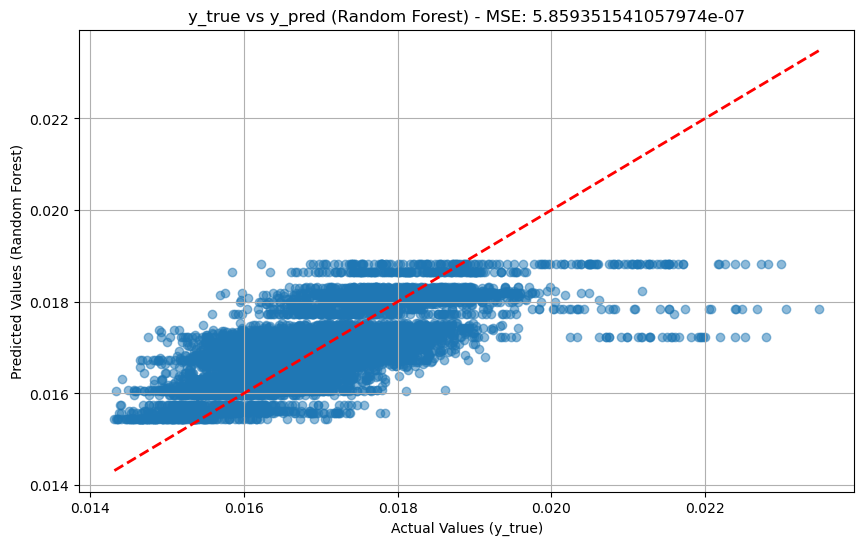

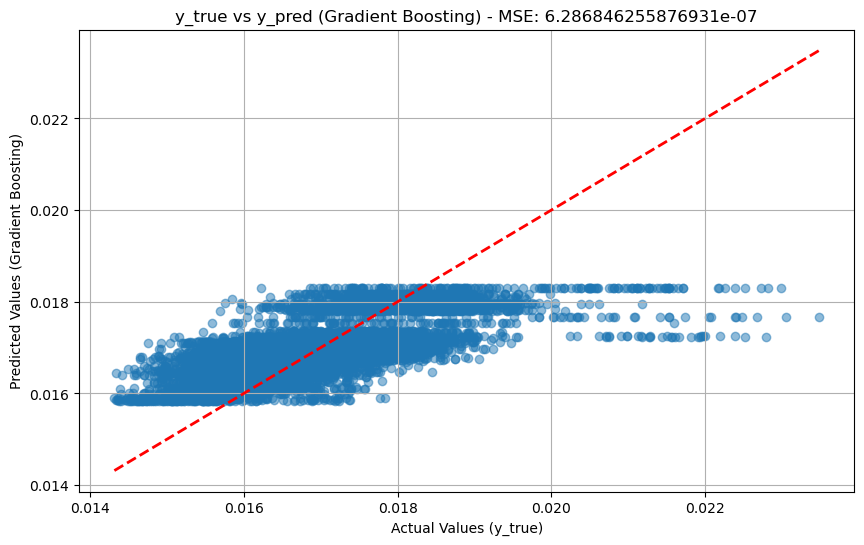

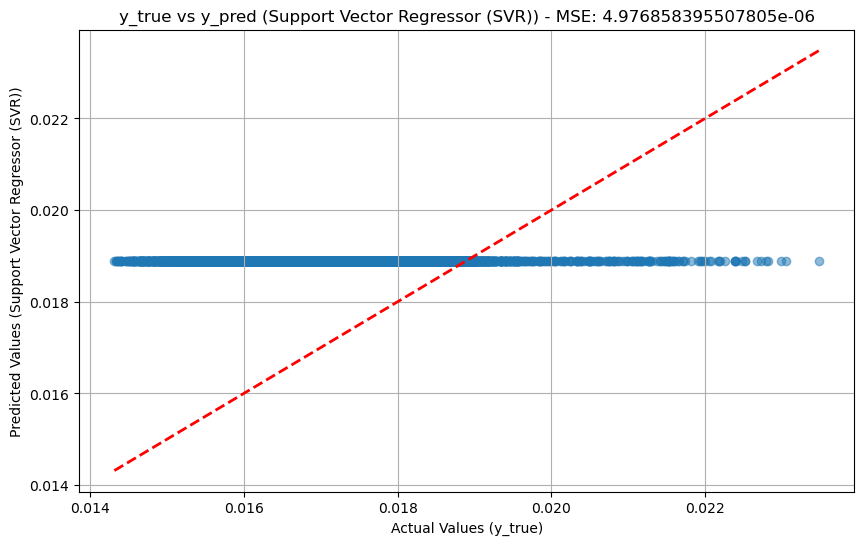

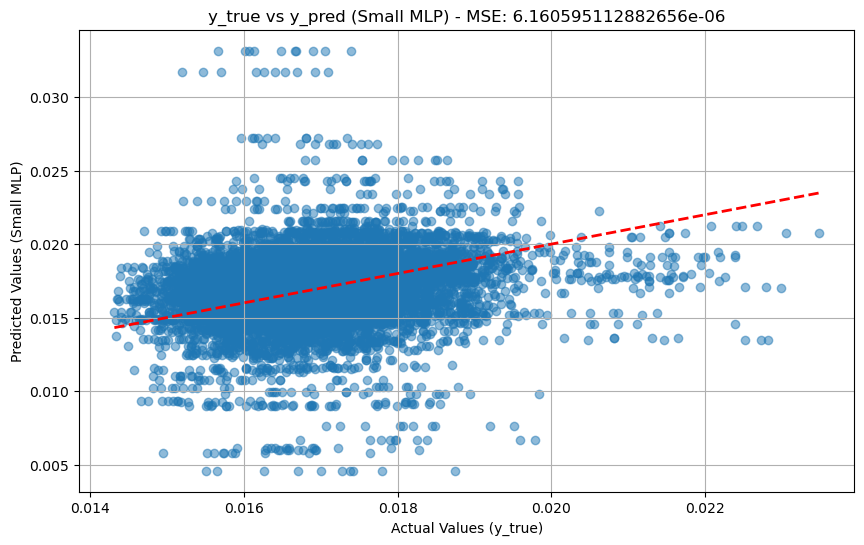

Random Forest - Result: 5.859351541057974e-07
Gradient Boosting - Result: 6.286846255876931e-07
Support Vector Regressor (SVR) - Result: 4.976858395507805e-06
Small MLP - Result: 6.160595112882656e-06


: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract features and target
X = get_binary_features(df_not_grouped)
y = df_not_grouped["test_loss"]

# Split data into train/test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with optimal parameters for binary features and small regression targets
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=20, max_depth=5),
    "Small MLP": MLPRegressor(hidden_layer_sizes=(16, 16), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=3000, random_state=42, alpha=0)
}

# Fit models, evaluate, and save plots
results = {}

for model_name, model in models.items():
    # Fit model
    model.fit(X, y)
    # Predict on test data
    y_pred = model.predict(X)
    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    results[model_name] = mse

    # Save plot of y_true vs y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Values (y_true)")
    plt.ylabel(f"Predicted Values ({model_name})")
    plt.title(f"y_true vs y_pred ({model_name}) - MSE: {mse}")
    plt.grid(True)
    plt.show()
    
# Print MSE for all models
for model_name, result in results.items():
    print(f"{model_name} - Result: {result}")


In [ ]:
X_train = X
X_test = X
y_train = y
y_test = y

: 

In [ ]:
## Random Forest - Hyperparameter Tuning
#from sklearn.model_selection import GridSearchCV

#param_grid_rf = {
#    "n_estimators": [10, 20],
#    "criterion":["squared_error", "absolute_error"],
#    "max_depth": [3, 5, 10, None],
#    "min_samples_split": [2, 5],
#    "min_samples_leaf": [1, 2, 5]
#}

#grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="neg_mean_squared_error")
#grid_search_rf.fit(X_train, y_train)

#best_rf = grid_search_rf.best_estimator_
#print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
#y_pred_rf = best_rf.predict(X_test)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
#print("Random Forest - Improved MSE:", mse_rf)


: 

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error

## Define parameter grid
#param_grid_gb = {
#    "loss":["squarred_error", "absolute_error"],
#    "n_estimators": [10, 20],
#    "learning_rate": [0.001, 0.01, 0.1],
#    "max_depth": [3, 5, 7],
#    "subsample": [0.8, 1.0]
#}

## Perform grid search
#grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring="neg_mean_squared_error")
#grid_search_gb.fit(X_train, y_train)

## Best model and evaluation
#best_gb = grid_search_gb.best_estimator_
#print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
#y_pred_gb = best_gb.predict(X_test)
#mse_gb = mean_squared_error(y_test, y_pred_gb)
#print("Gradient Boosting - Improved MSE:", mse_gb)


: 

In [ ]:
# Function to plot the best model's predictions
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

def plot_best_model(y_test, y_pred, model_name, mse):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Values (y_true)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title(f"{model_name} - Best Model Predictions\nMSE: {mse}")
    plt.grid(True)
    plt.show()

: 

MLP - Best Parameters: {'alpha': 0, 'batch_size': 8, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.0001, 'max_iter': 2000}
MLP - Improved MSE: 1.1524031174533991e-06


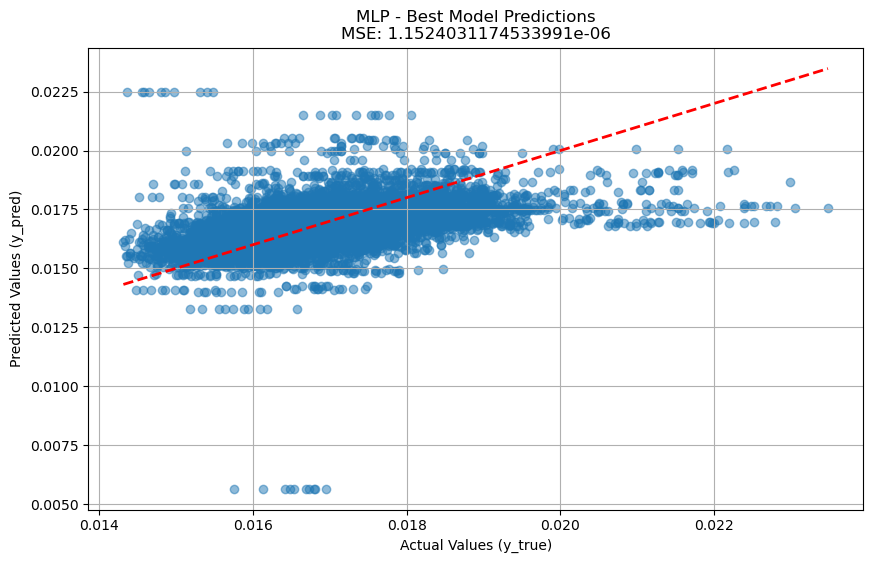

: 

In [ ]:
# Small MLP - Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    "hidden_layer_sizes": [(10)],
    "learning_rate_init": [0.0001],
    "batch_size": [8],
    "alpha": [0],
    "max_iter": [3000]
}

grid_search_mlp = GridSearchCV(MLPRegressor(activation="relu", solver="adam", random_state=42), param_grid_mlp, cv=5, scoring="neg_mean_squared_error")
grid_search_mlp.fit(X_train, y_train)

best_mlp = grid_search_mlp.best_estimator_
print("MLP - Best Parameters:", grid_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("MLP - Improved MSE:", mse_mlp)

plot_best_model(y_test, y_pred_mlp, "MLP", mse_mlp)


# Kinda old!

In [ ]:
# fill dataframe with group means and stds



group_list = []

for group, df in results_out.groupby(["features"]):
    print(group)
    print(df["model_losses"].mean())
    print(df["model_losses"].std())
    print()
    # add data to new dataframe
    
    group_list.append(
        (group[0], df["model_losses"].mean(), df["model_losses"].std())
    )
    
df_plot = pd.DataFrame(group_list, columns=["features", "mean", "std"])



('occrate',)
0.020438333333333336
0.0002250896117845821

('occrate_avgocc',)
0.018653666666666666
0.0003666365139117126

('occrate_avgocc_coursenumber',)
0.016270666666666666
0.00020652441340755182

('occrate_coursenumber',)
0.016612666666666668
0.0004147051161166604



: 

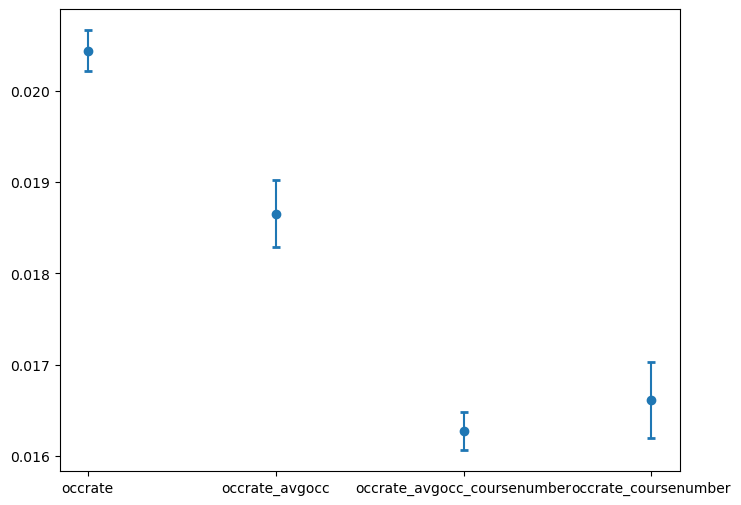

: 

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Plot mean with error bars (standard deviation)
ax.errorbar(
    df_plot["features"],
    df_plot["mean"],
    yerr=df_plot["std"],
    fmt="o",
    capsize=3,
    capthick=2,
    label="Mean MAE with Std Dev",
)

plt.show()

In [ ]:
def advanced_grouping_function(features):
    if "coursenumber" in features:
        return "yes"
    else:
        return "no"
    
    

: 

In [ ]:
def advanced_grouping_function(features):
    if "coursenumber" in features:
        return "yes"
    else:
        return "no"
group_by_avgocc = results_out.groupby(results_out["features"].apply(advanced_grouping_function))
group_by_avgocc["model_losses"].mean()


features
no     0.019546
yes    0.016442
Name: model_losses, dtype: float64

: 

In [ ]:
def advanced_grouping_function(features):
    if "avgocc" in features:
        return "yes"
    else:
        return "no"
    
group_by_avgocc = results_out.groupby(results_out["features"].apply(advanced_grouping_function))
group_by_avgocc["model_losses"].mean()

features
no     0.018526
yes    0.017462
Name: model_losses, dtype: float64

: 

: 

In [ ]:
pretty_results = results_out[["features", "model_losses", "avg_baselines", "naive_baselines", "zero_baselines"]]

# split features by "_"
pretty_results["features"] = pretty_results["features"].apply(lambda x: x.split("_"))

# do not cut off columns
pd.set_option('display.max_colwidth', None)
pretty_results.reset_index(drop=True, inplace=True)



: 

In [ ]:
#pretty_results.to_csv("pretty_results.csv", index=False)

: 